## Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve,roc_auc_score,recall_score, f1_score


In [2]:
def ca(name,y_test,y_pred):
  # Confusion_matrix with Accuracy Score Print
  cm=confusion_matrix(y_test,y_pred)
  acc_sc=accuracy_score(y_test,y_pred)
  prec_sc= precision_score(y_test,y_pred)
  rec_sc=recall_score(y_test,y_pred)
  f1_sc=f1_score(y_test,y_pred)
  return [name,cm,[acc_sc,prec_sc, rec_sc,f1_sc]]

## Import Dataset

In [3]:

dataset = pd.read_csv('water_potability.csv')

print(dataset.info())
dataset=dataset.drop(['Conductivity'],axis=1)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


## EDA and Preprocessing

### Info and Describe

In [4]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,11.558279,31.997993,4.075075,0


In [5]:
dataset.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,16.140368,78.698446,2.309149,1


In [6]:
dataset.shape

(3276, 9)

In [7]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,28.300000,124.000000,6.739000,1.000000


In [8]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
dataset.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

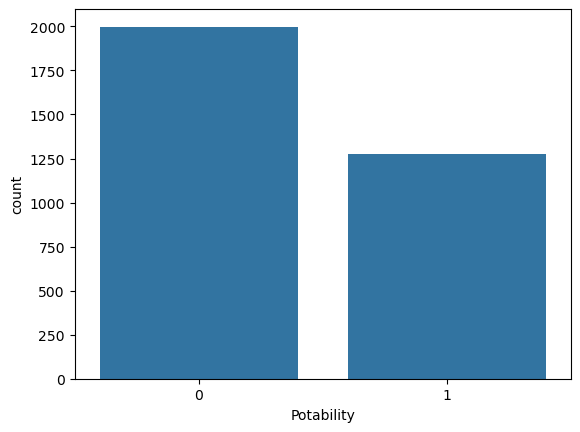

In [10]:
sns.countplot(x='Potability', data=dataset)

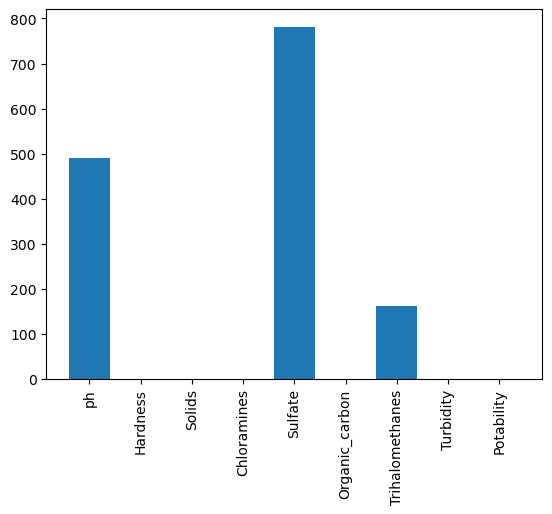

In [11]:
plt.bar(dataset.columns,dataset.isnull().sum())
plt.xticks(rotation=90)
plt.show()

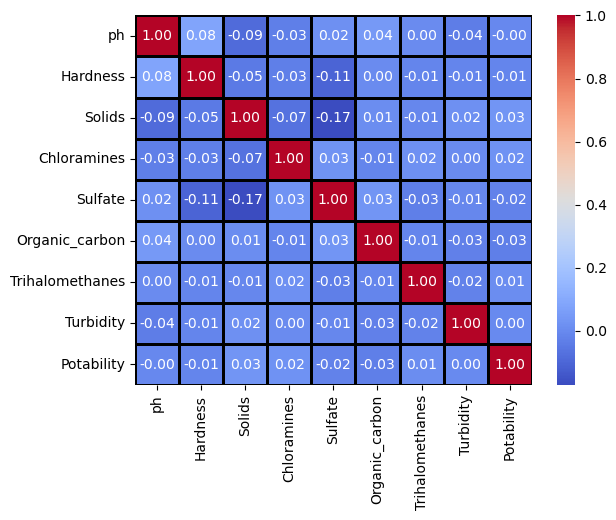

In [12]:
d_cor=dataset.corr()
sns.heatmap(d_cor,annot=True,cmap='coolwarm',fmt='.2f', linewidths=2,annot_kws={'size':10},linecolor='black')
plt.rcParams['figure.figsize']=[25,15]
plt.show()

In [13]:

dataset.dropna(axis=0,inplace=True)
dataset=dataset.drop([ 'Hardness', 'Sulfate', 'Organic_carbon'],axis=1)
print(dataset.isnull().sum())

ph                 0
Solids             0
Chloramines        0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [14]:
data_column=dataset.columns
for i,j in enumerate(data_column):
  print(i,j)

0 ph
1 Solids
2 Chloramines
3 Trihalomethanes
4 Turbidity
5 Potability


### Checking for Outliers and Removing Outliers

C:\Users\Pranhav Vimal\AppData\Local\Temp\ipykernel_31580\27705349.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


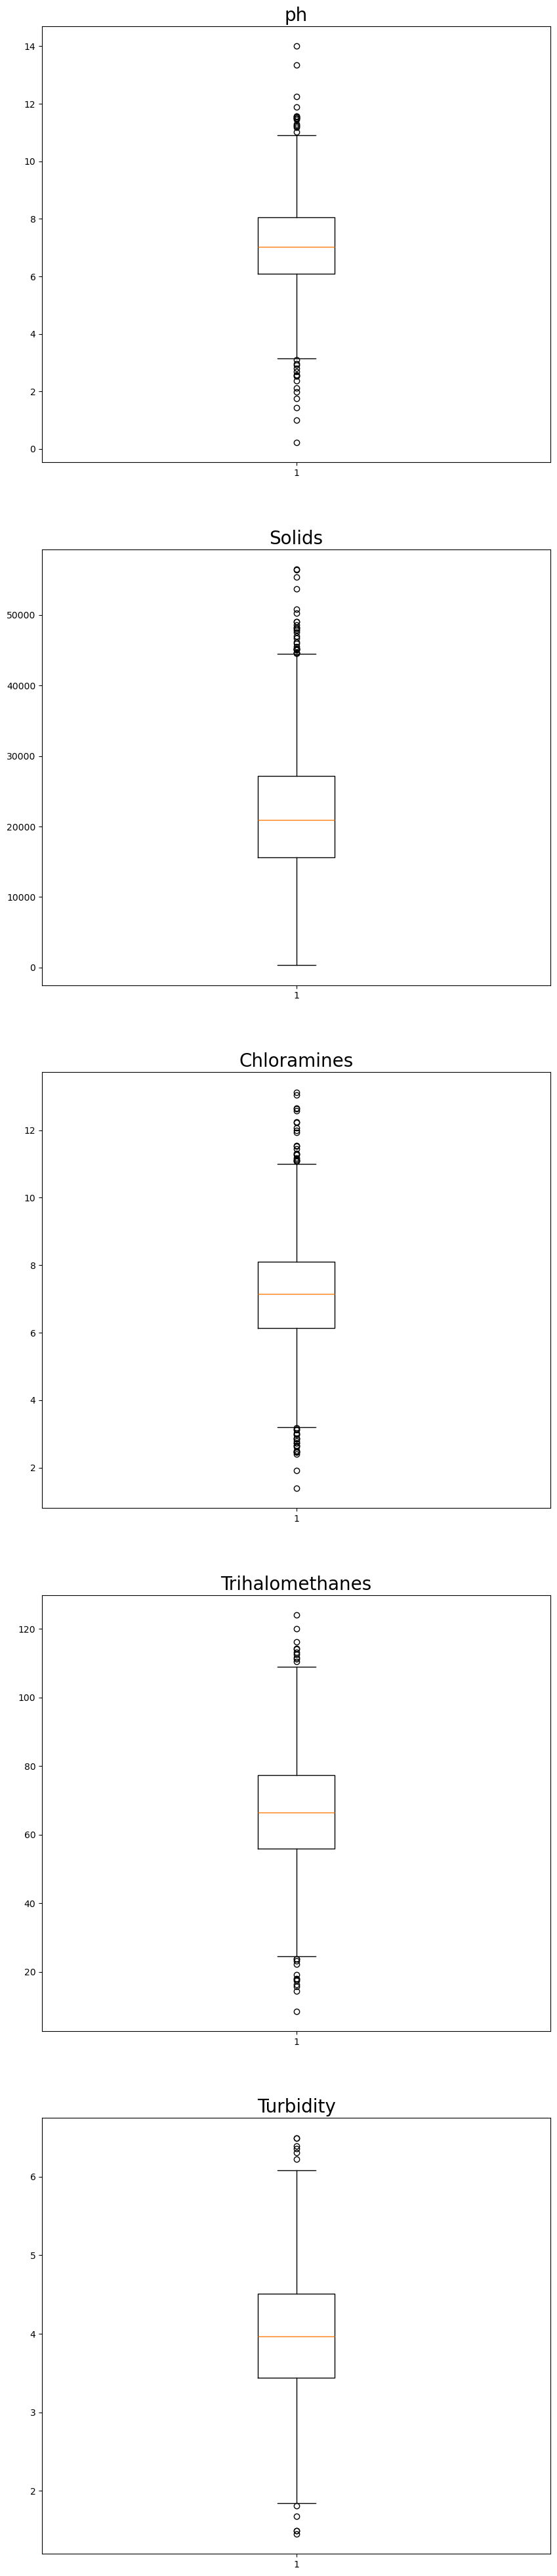

In [15]:
fig,ax= plt.subplots(5,figsize=(10,50))

for i,j in enumerate(data_column[:-1]):
  ax[i].boxplot(dataset[j])
  ax[i].set_title(j,fontsize=20)
fig.show()

#### Removing

In [16]:

n1=len(dataset)
from sklearn.cluster import KMeans
kmean_cls=KMeans(n_clusters=2,random_state=0)
kmean_cls.fit(dataset)
l=kmean_cls.labels_
k_data=dataset[l==1]
dataset=k_data.copy()
dataset.reset_index(inplace=True)
print(n1-len(dataset))


1215


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


#### Checking

C:\Users\Pranhav Vimal\AppData\Local\Temp\ipykernel_31580\2728164892.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


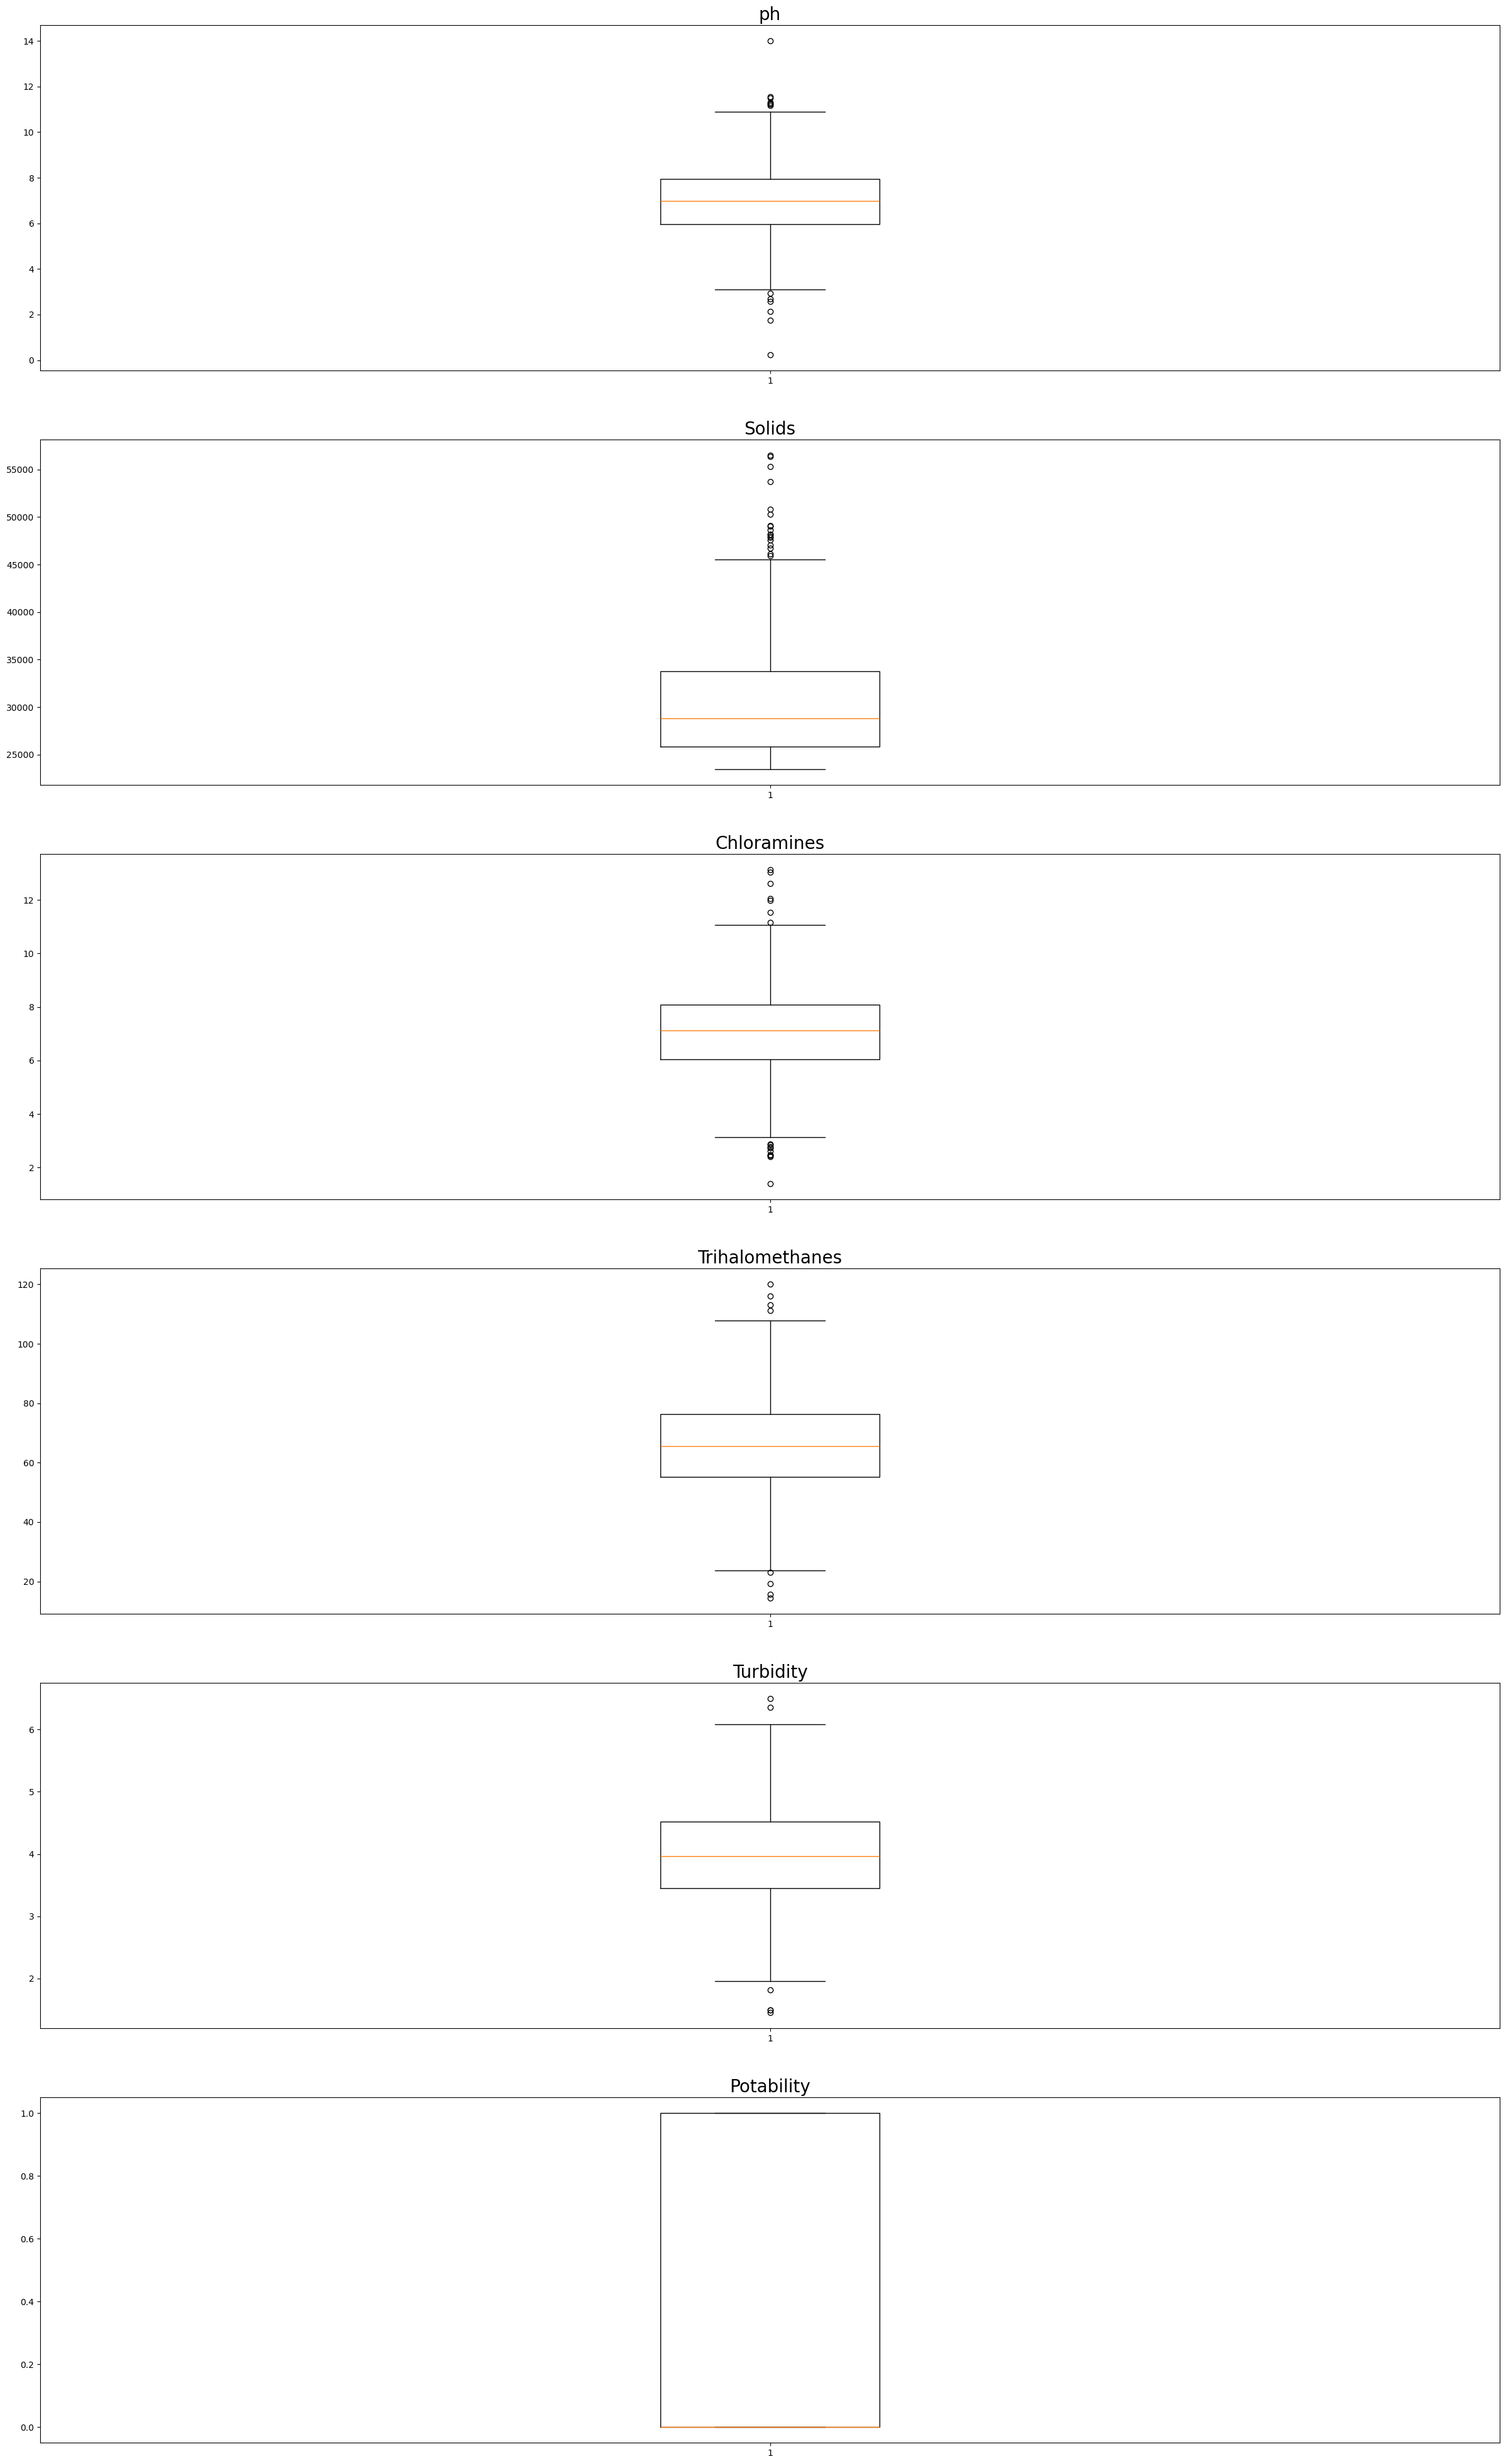

In [17]:
fig,ax= plt.subplots(6,figsize=(30,50))

for i,j in enumerate(data_column):
  ax[i].boxplot(dataset[j])
  ax[i].set_title(j,fontsize=20)
fig.show()

###Scatterplot

<Axes: xlabel='ph', ylabel='Trihalomethanes'>

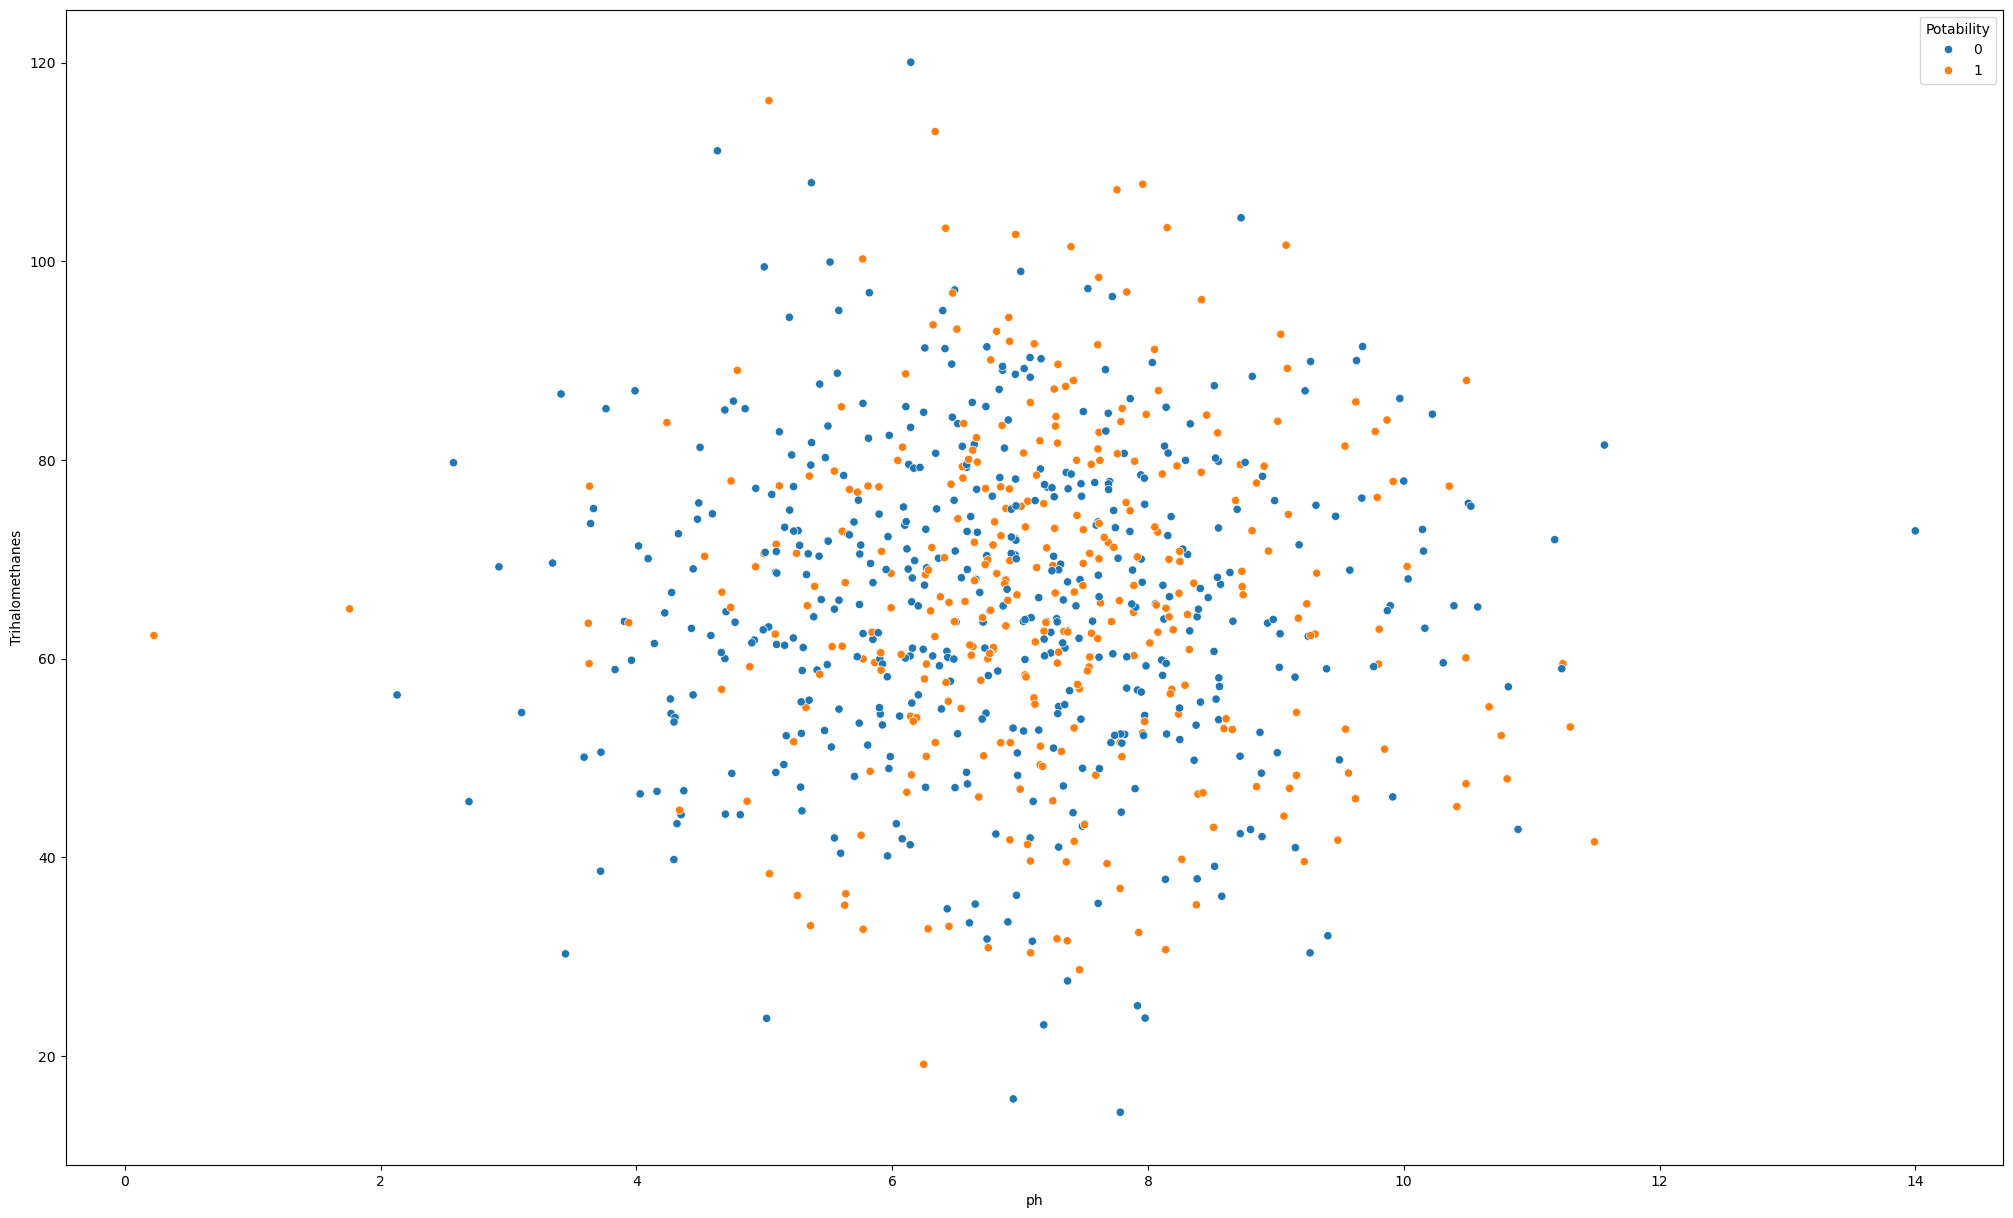

In [18]:
sns.scatterplot(x='ph',y='Trihalomethanes',data=dataset, hue='Potability')

<Axes: xlabel='ph', ylabel='Chloramines'>

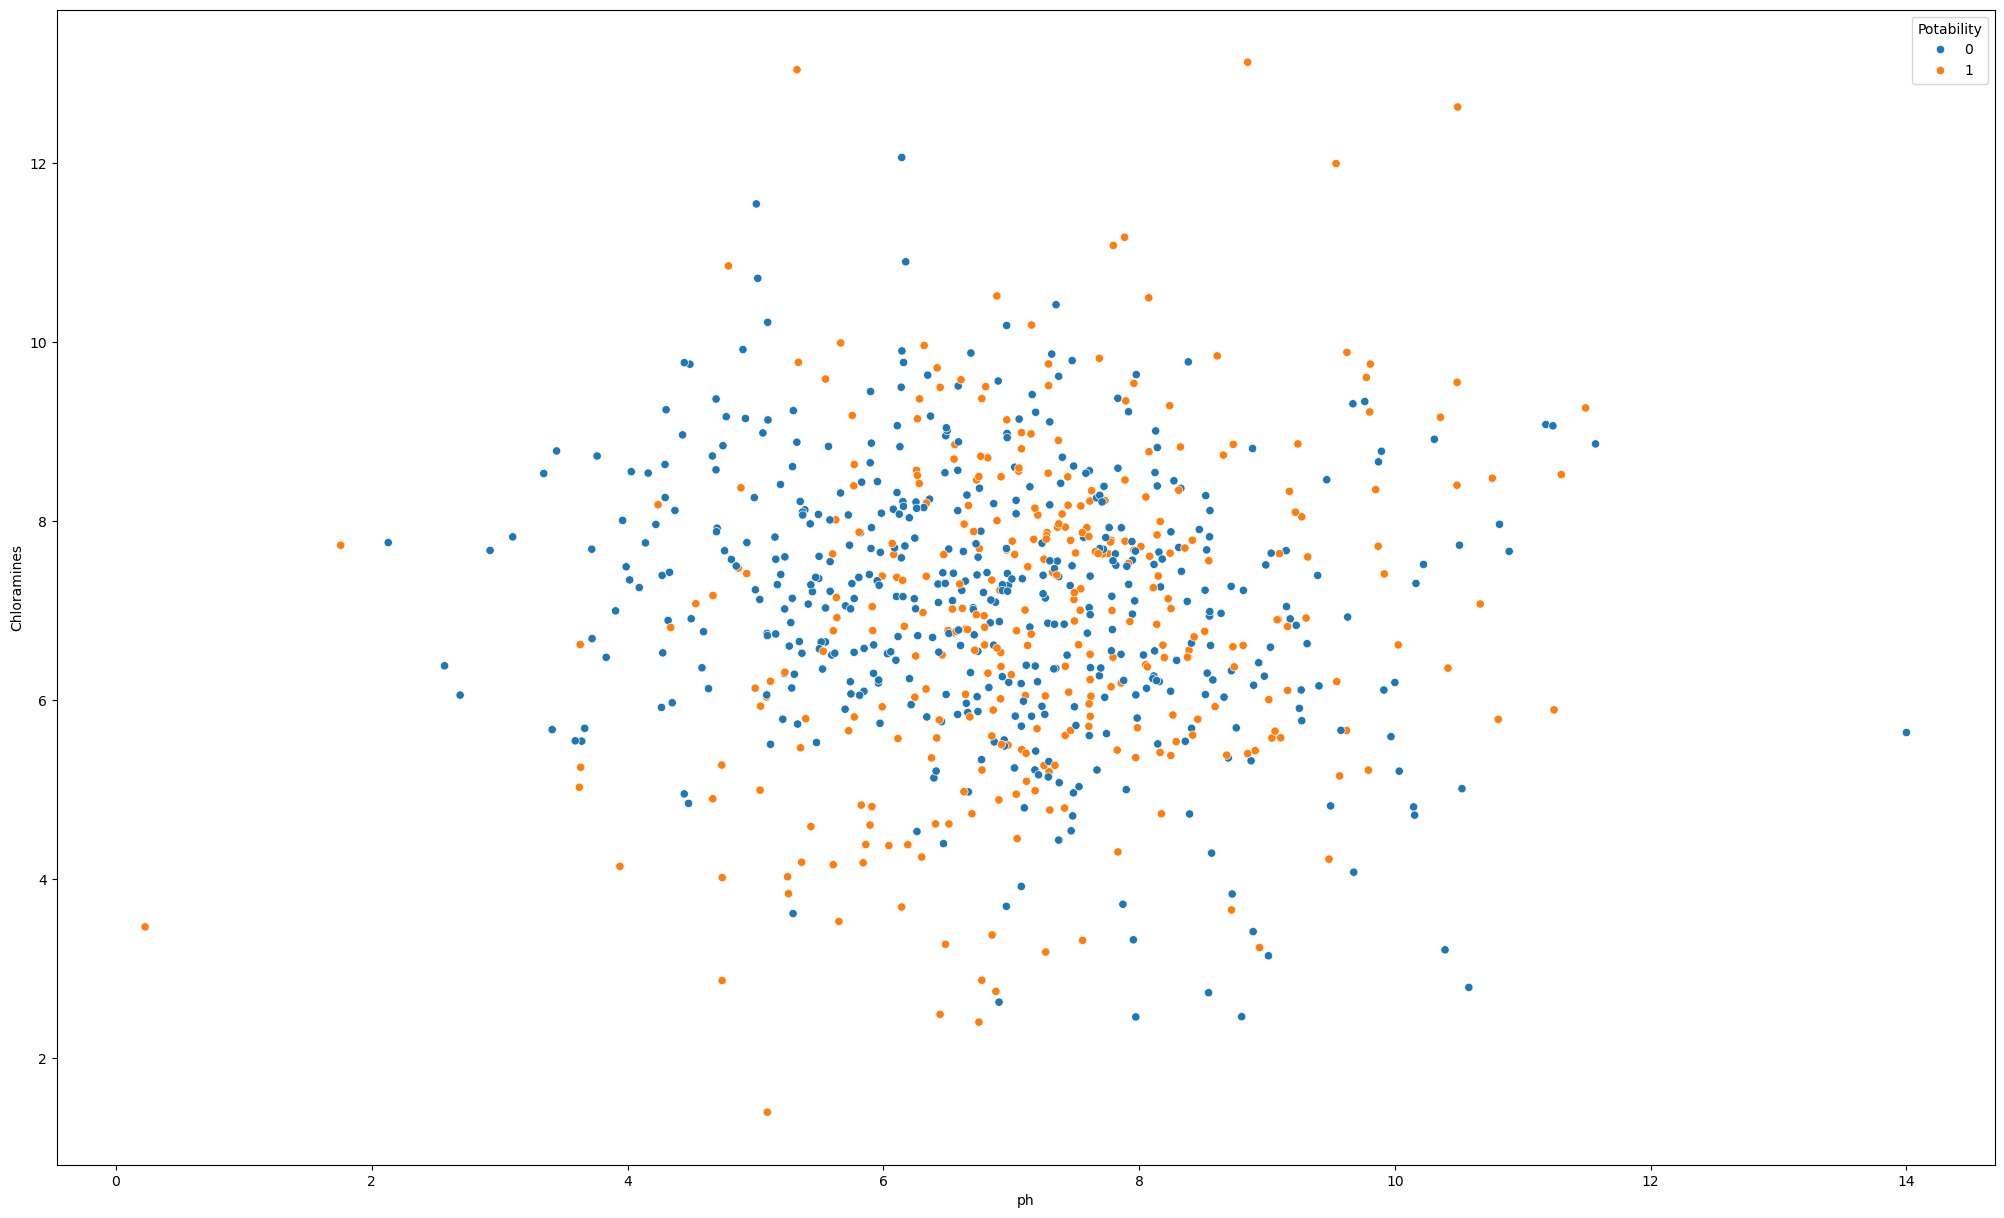

In [19]:
sns.scatterplot(x='ph',y='Chloramines',data=dataset, hue='Potability')

<Axes: xlabel='ph', ylabel='Solids'>

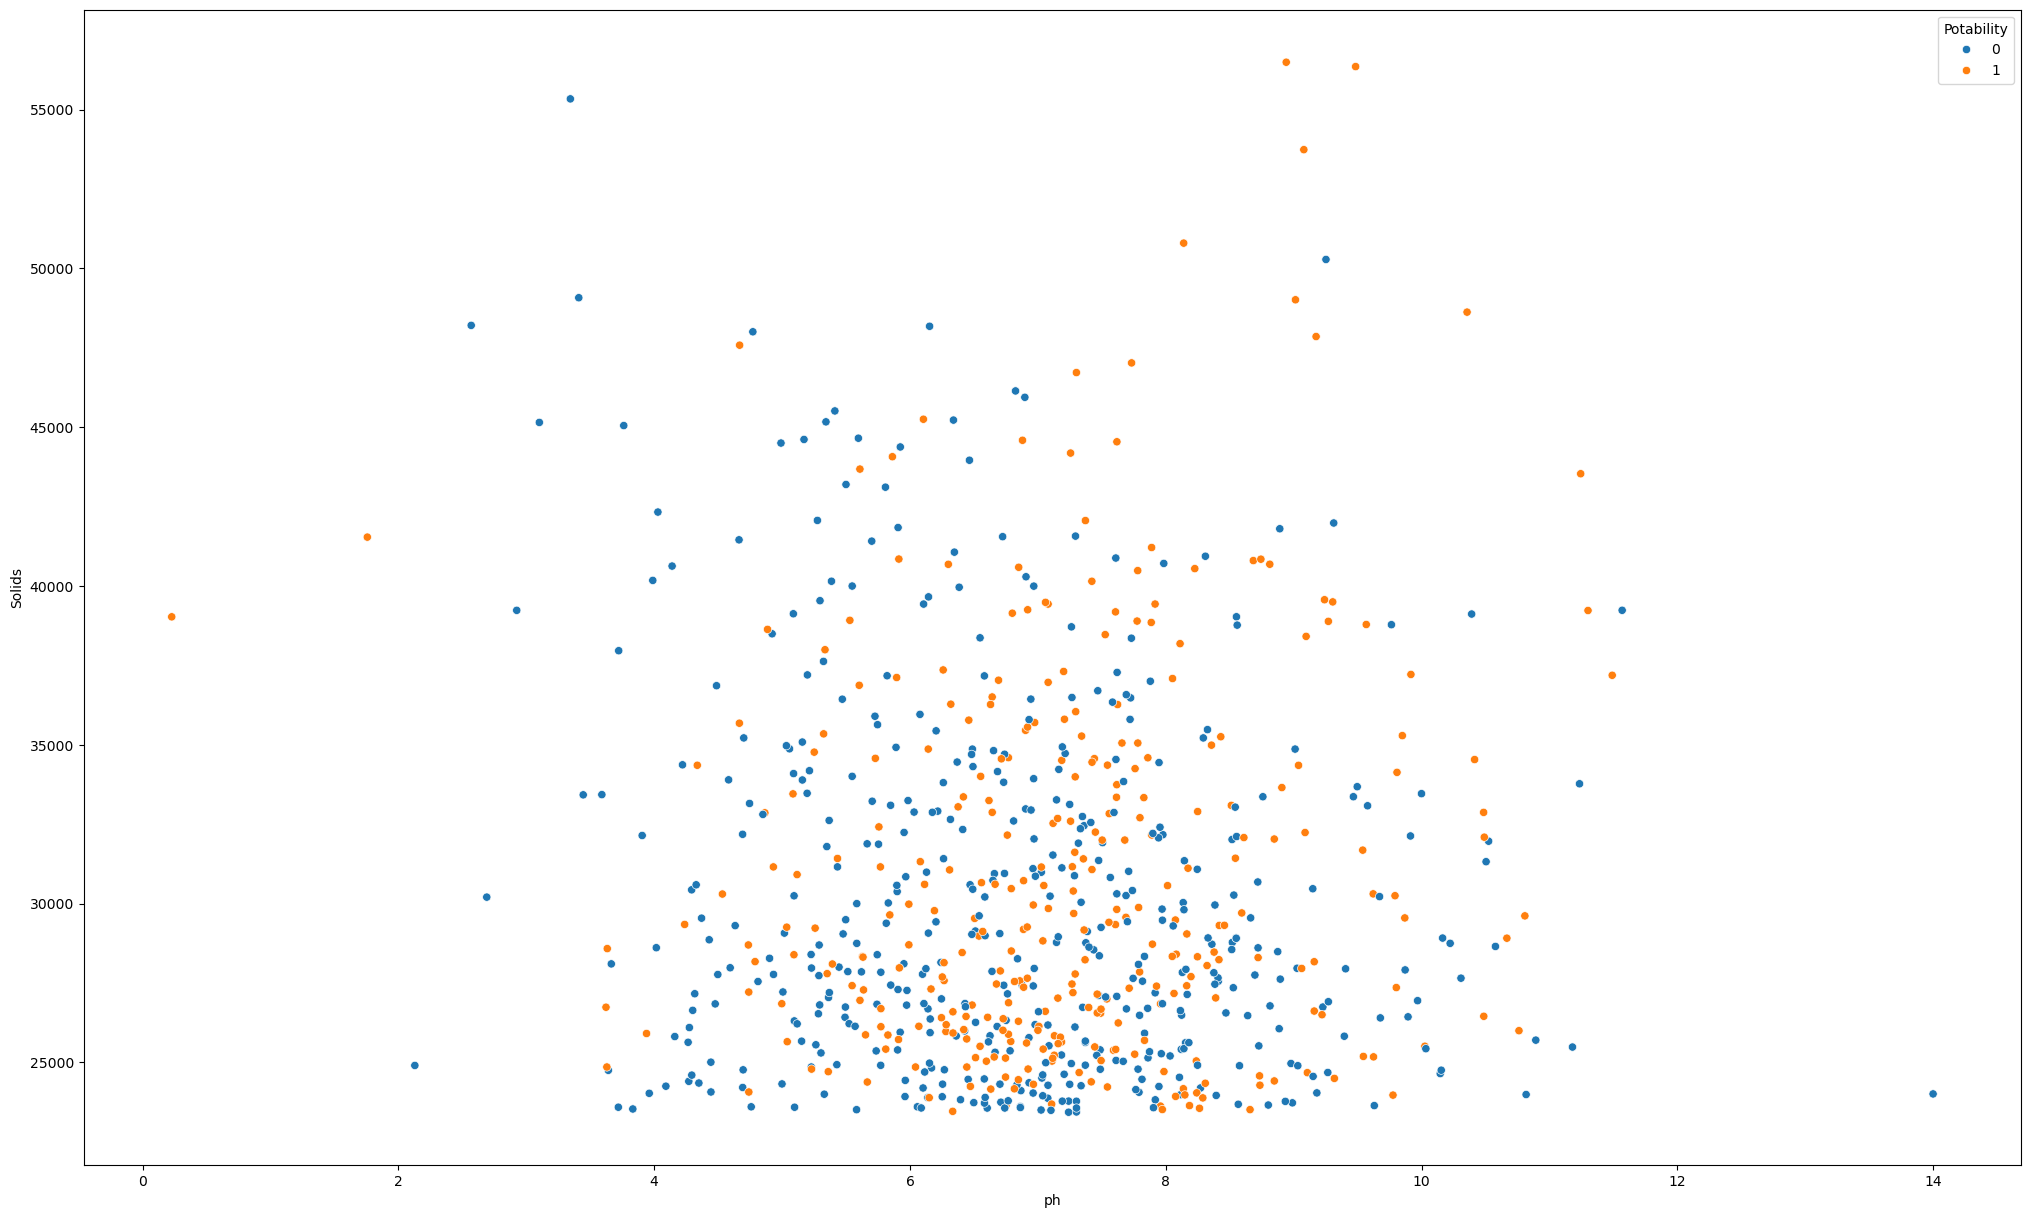

In [20]:
sns.scatterplot(x='ph',y='Solids',data=dataset, hue='Potability')

<Axes: xlabel='ph', ylabel='Turbidity'>

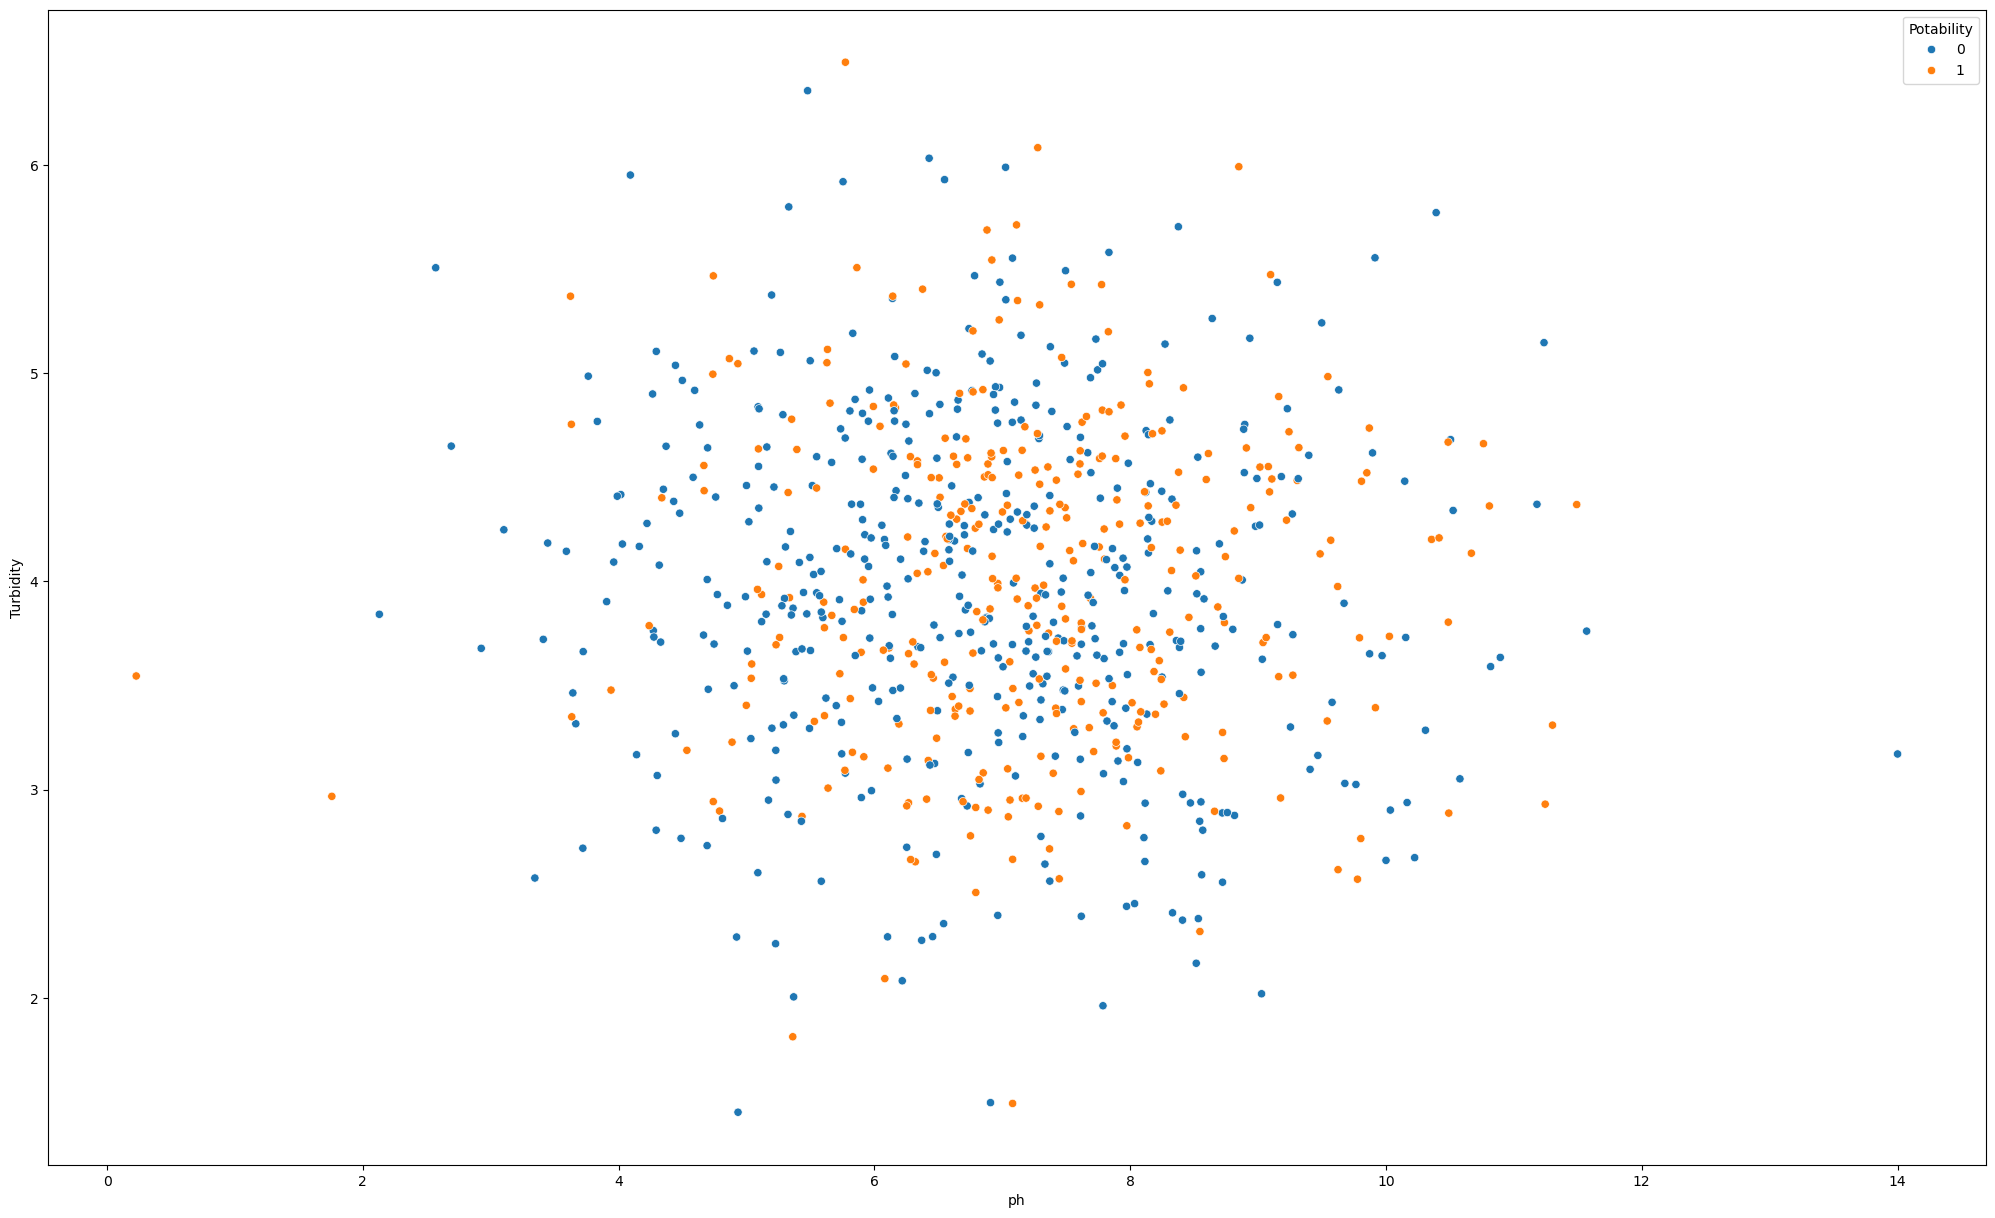

In [21]:
sns.scatterplot(x='ph',y='Turbidity',data=dataset, hue='Potability')

<Axes: xlabel='Solids', ylabel='Turbidity'>

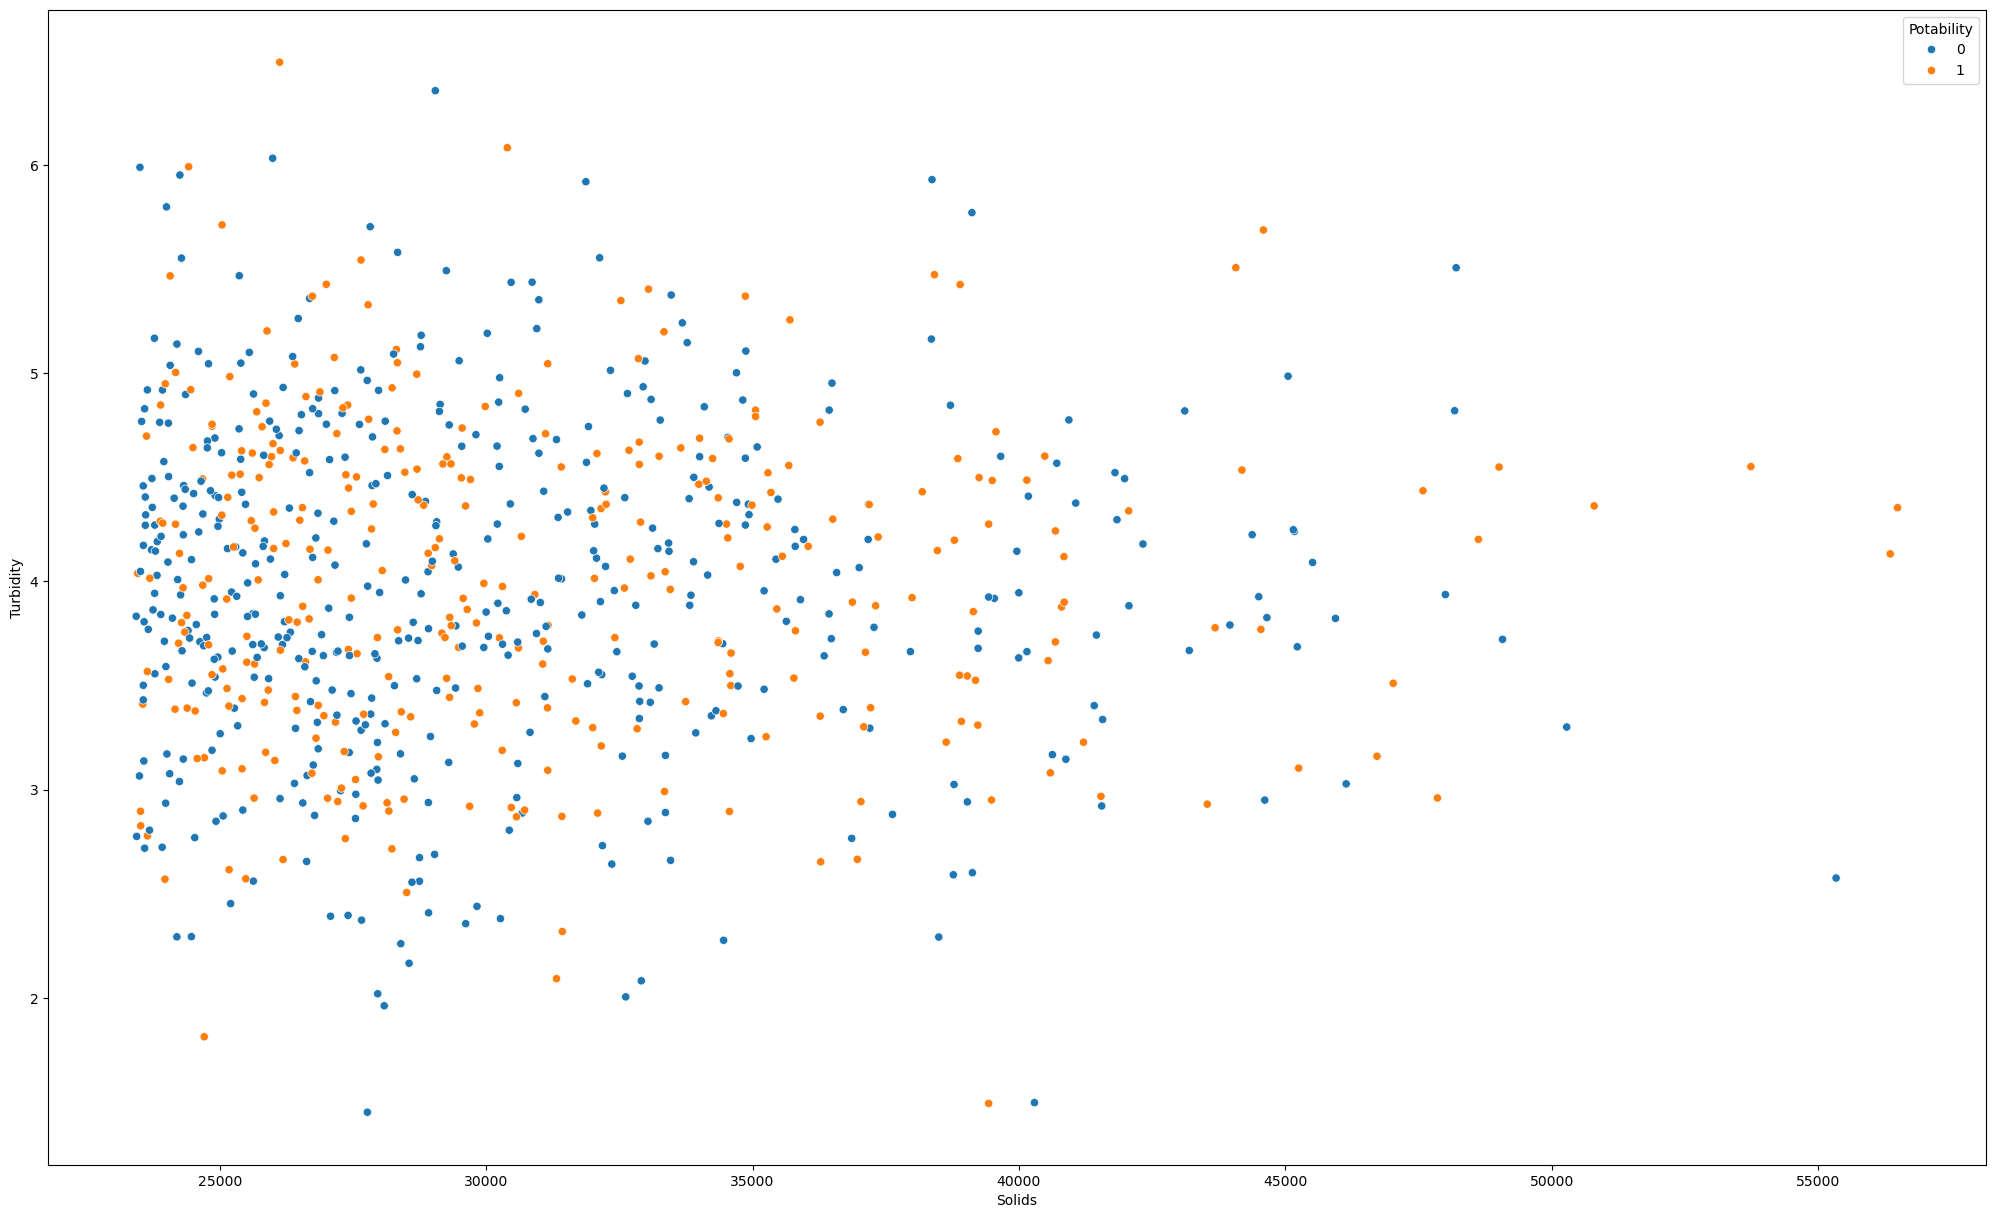

In [22]:
sns.scatterplot(x='Solids',y='Turbidity',data=dataset, hue='Potability')

<Axes: xlabel='Solids', ylabel='Chloramines'>

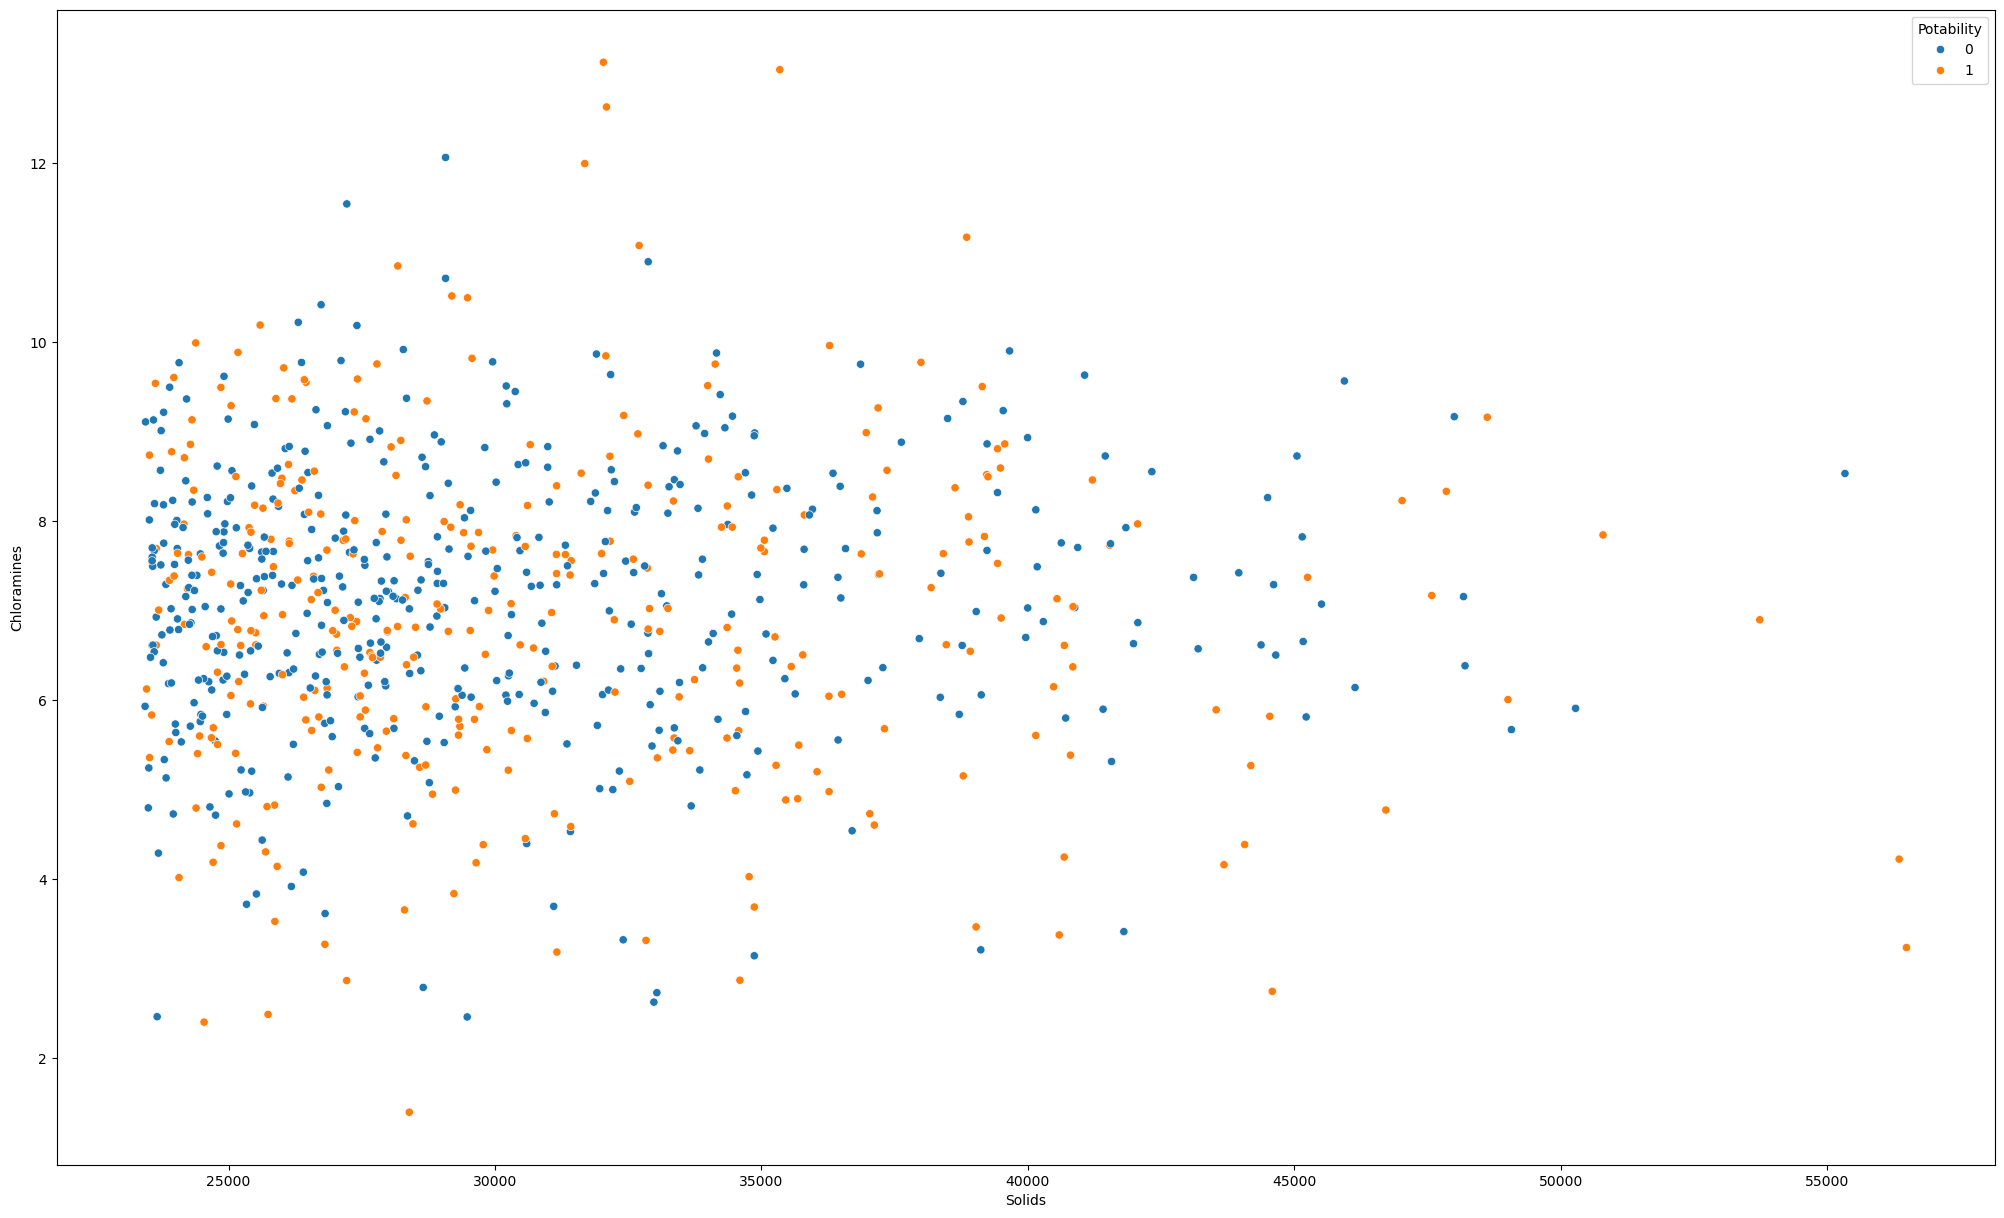

In [23]:
sns.scatterplot(x='Solids',y='Chloramines',data=dataset, hue='Potability')

<Axes: xlabel='Solids', ylabel='Trihalomethanes'>

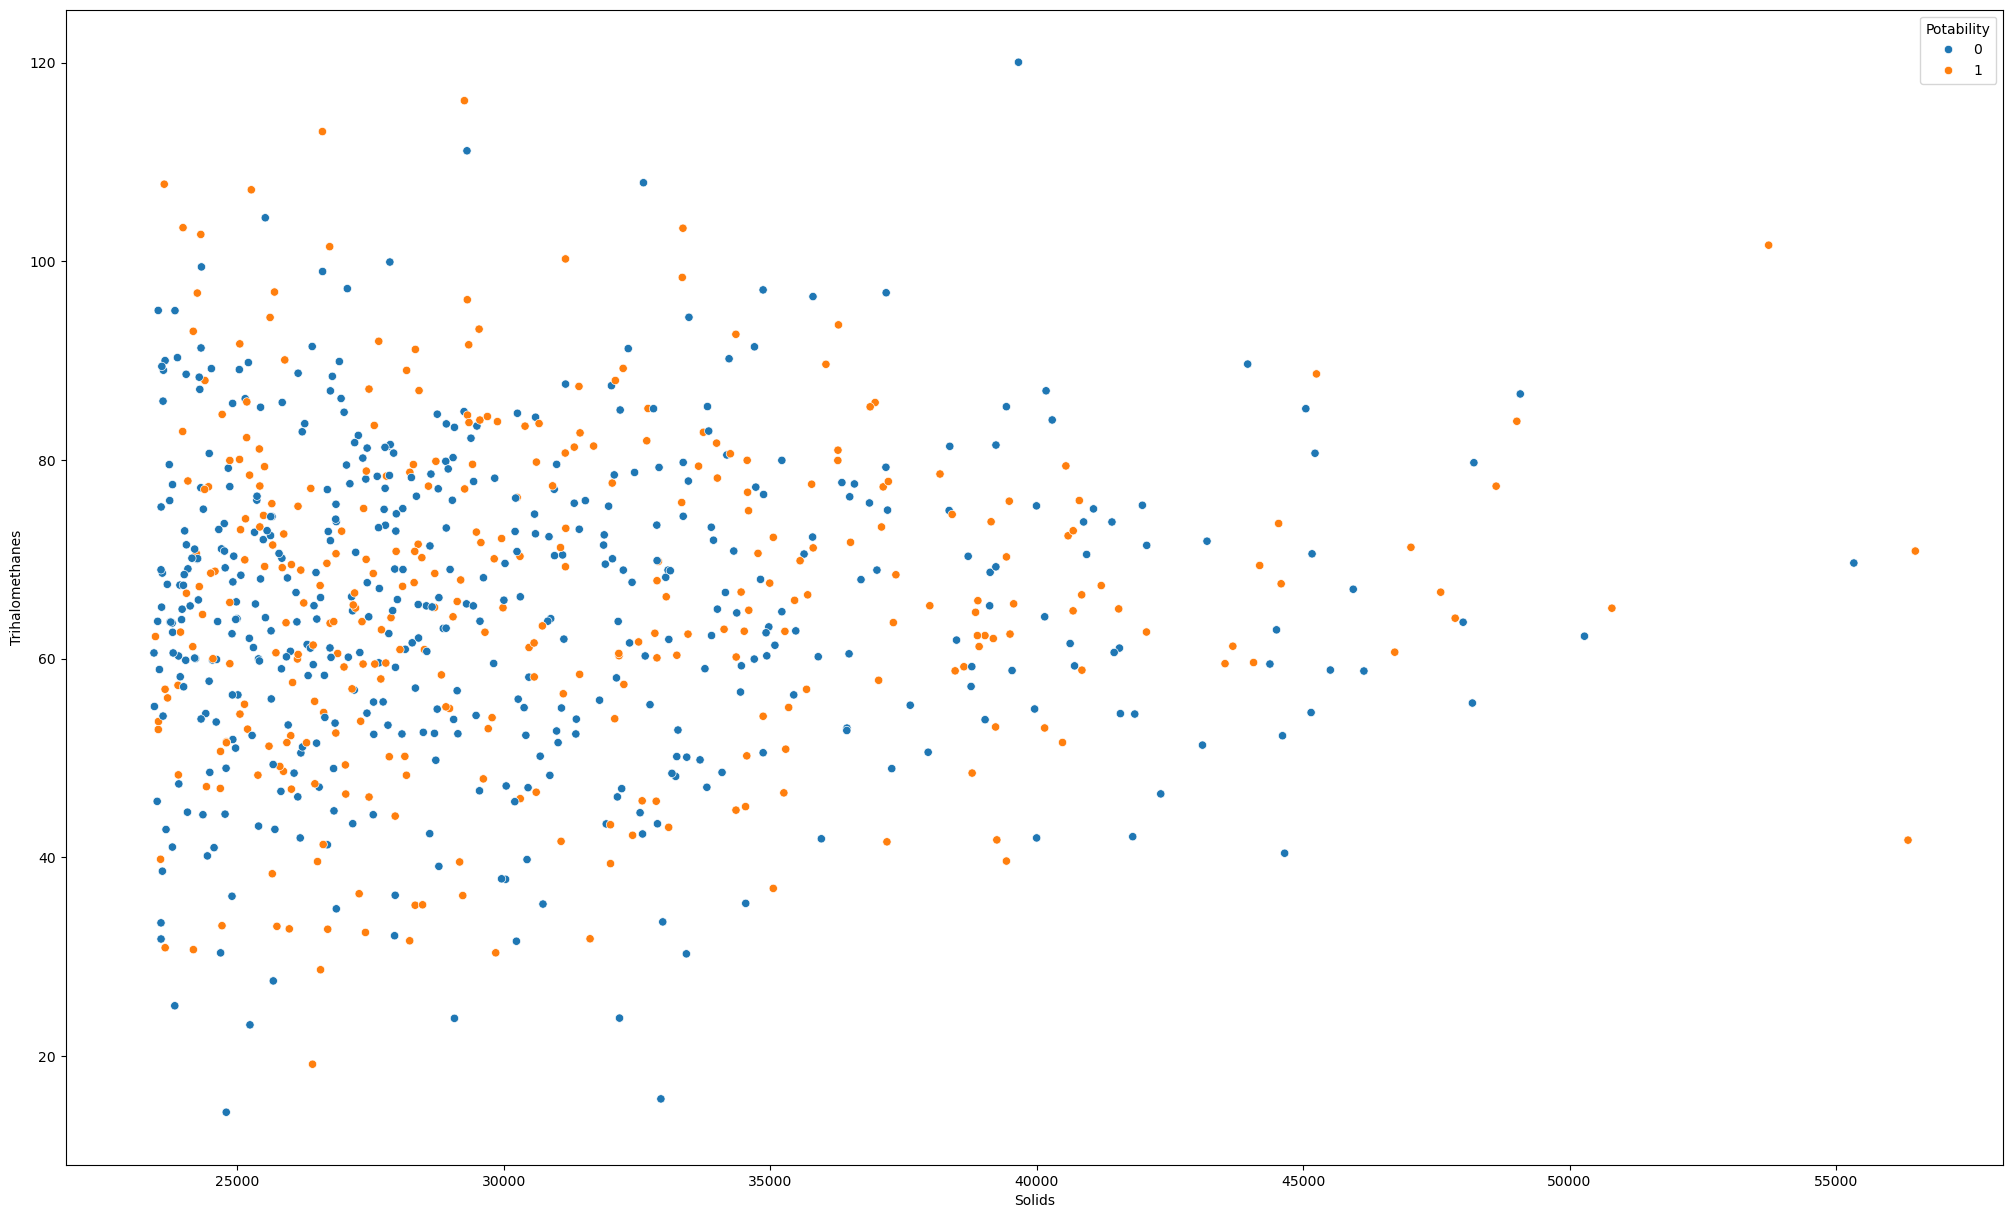

In [24]:
sns.scatterplot(x='Solids',y='Trihalomethanes',data=dataset, hue='Potability')

<Axes: xlabel='Turbidity', ylabel='Trihalomethanes'>

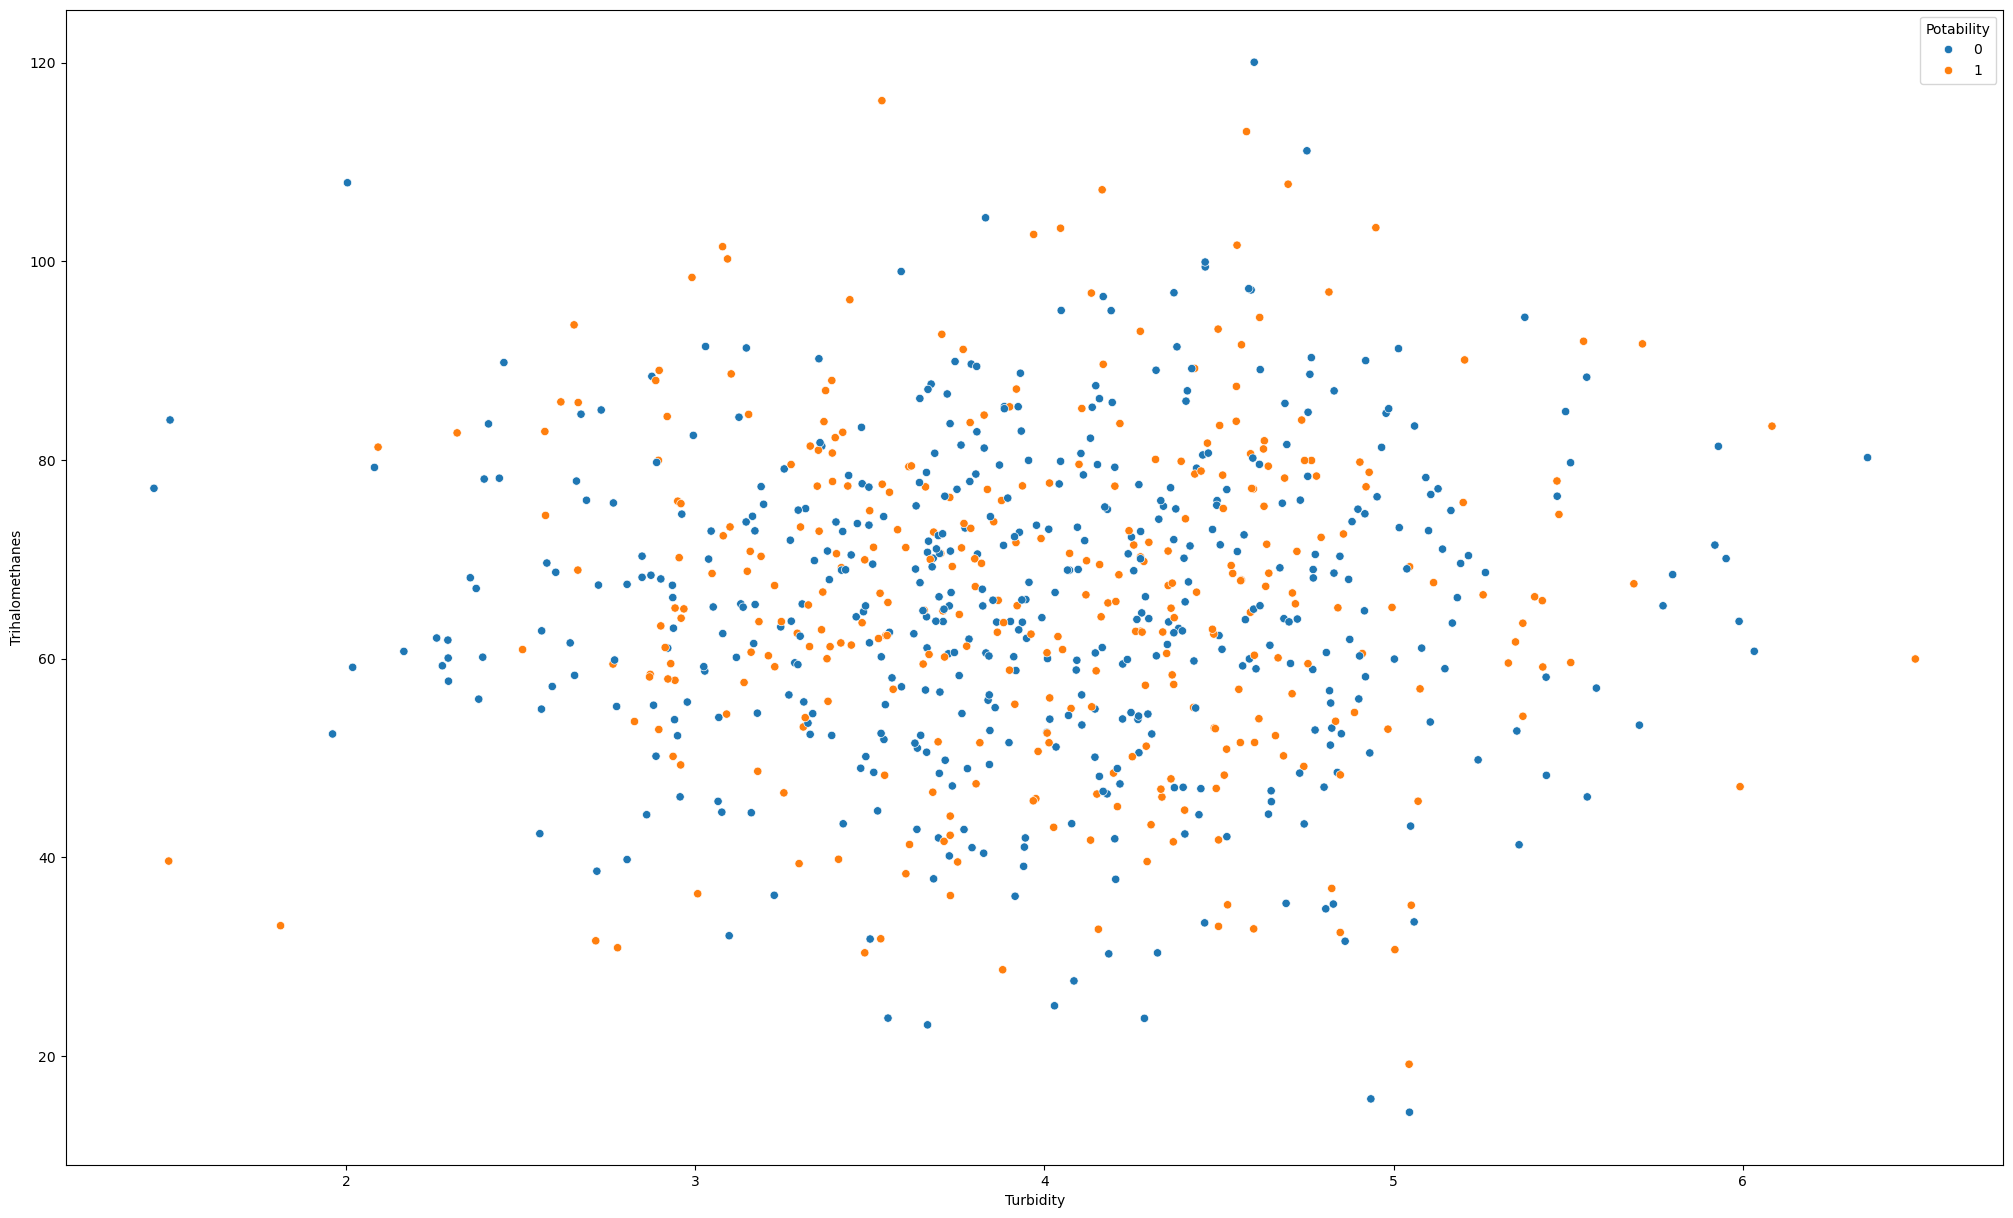

In [25]:
sns.scatterplot(x='Turbidity',y='Trihalomethanes',data=dataset, hue='Potability')

<Axes: xlabel='Turbidity', ylabel='Chloramines'>

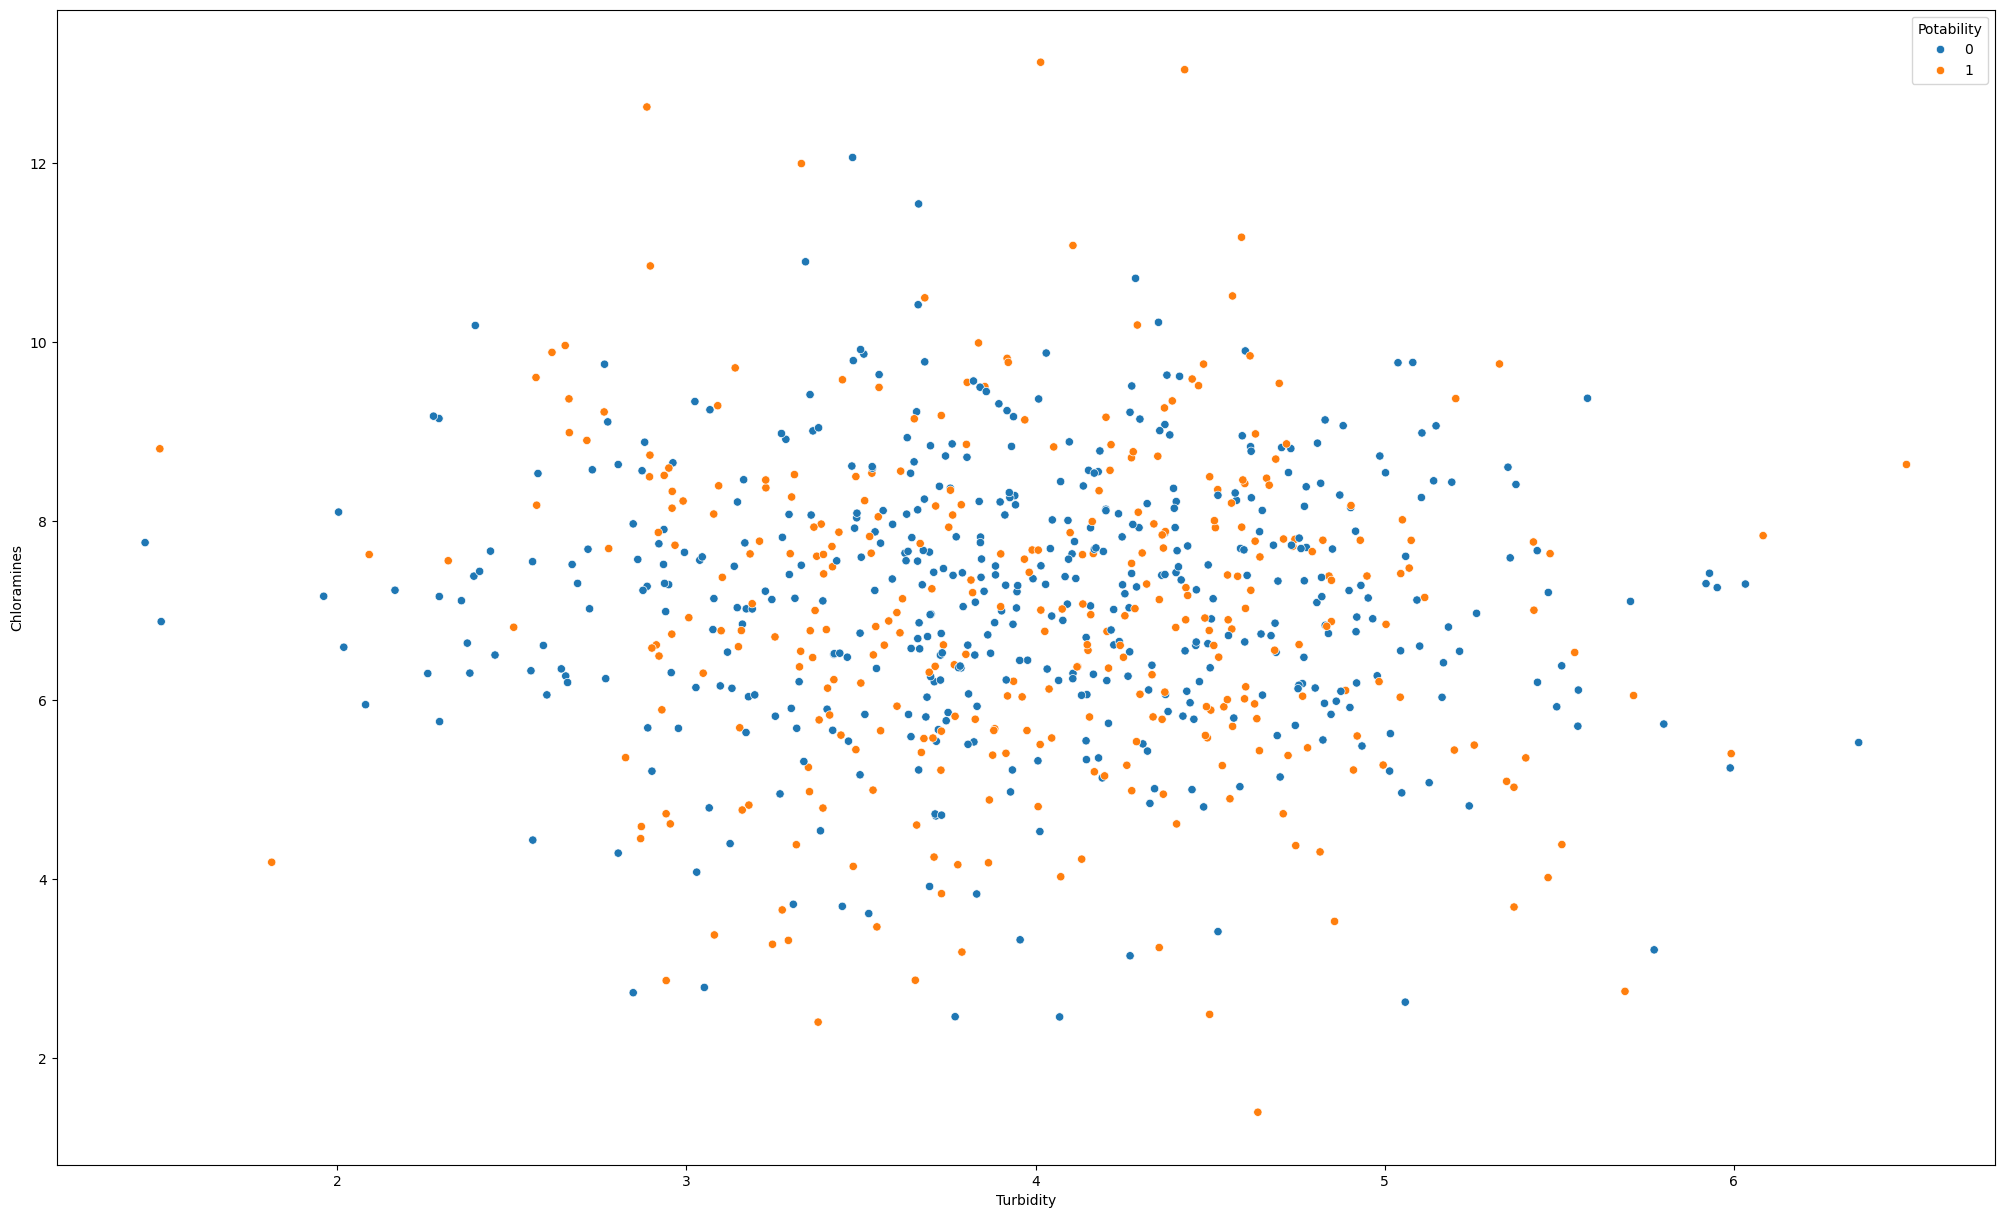

In [26]:
sns.scatterplot(x='Turbidity',y='Chloramines',data=dataset, hue='Potability')

<Axes: xlabel='Chloramines', ylabel='Trihalomethanes'>

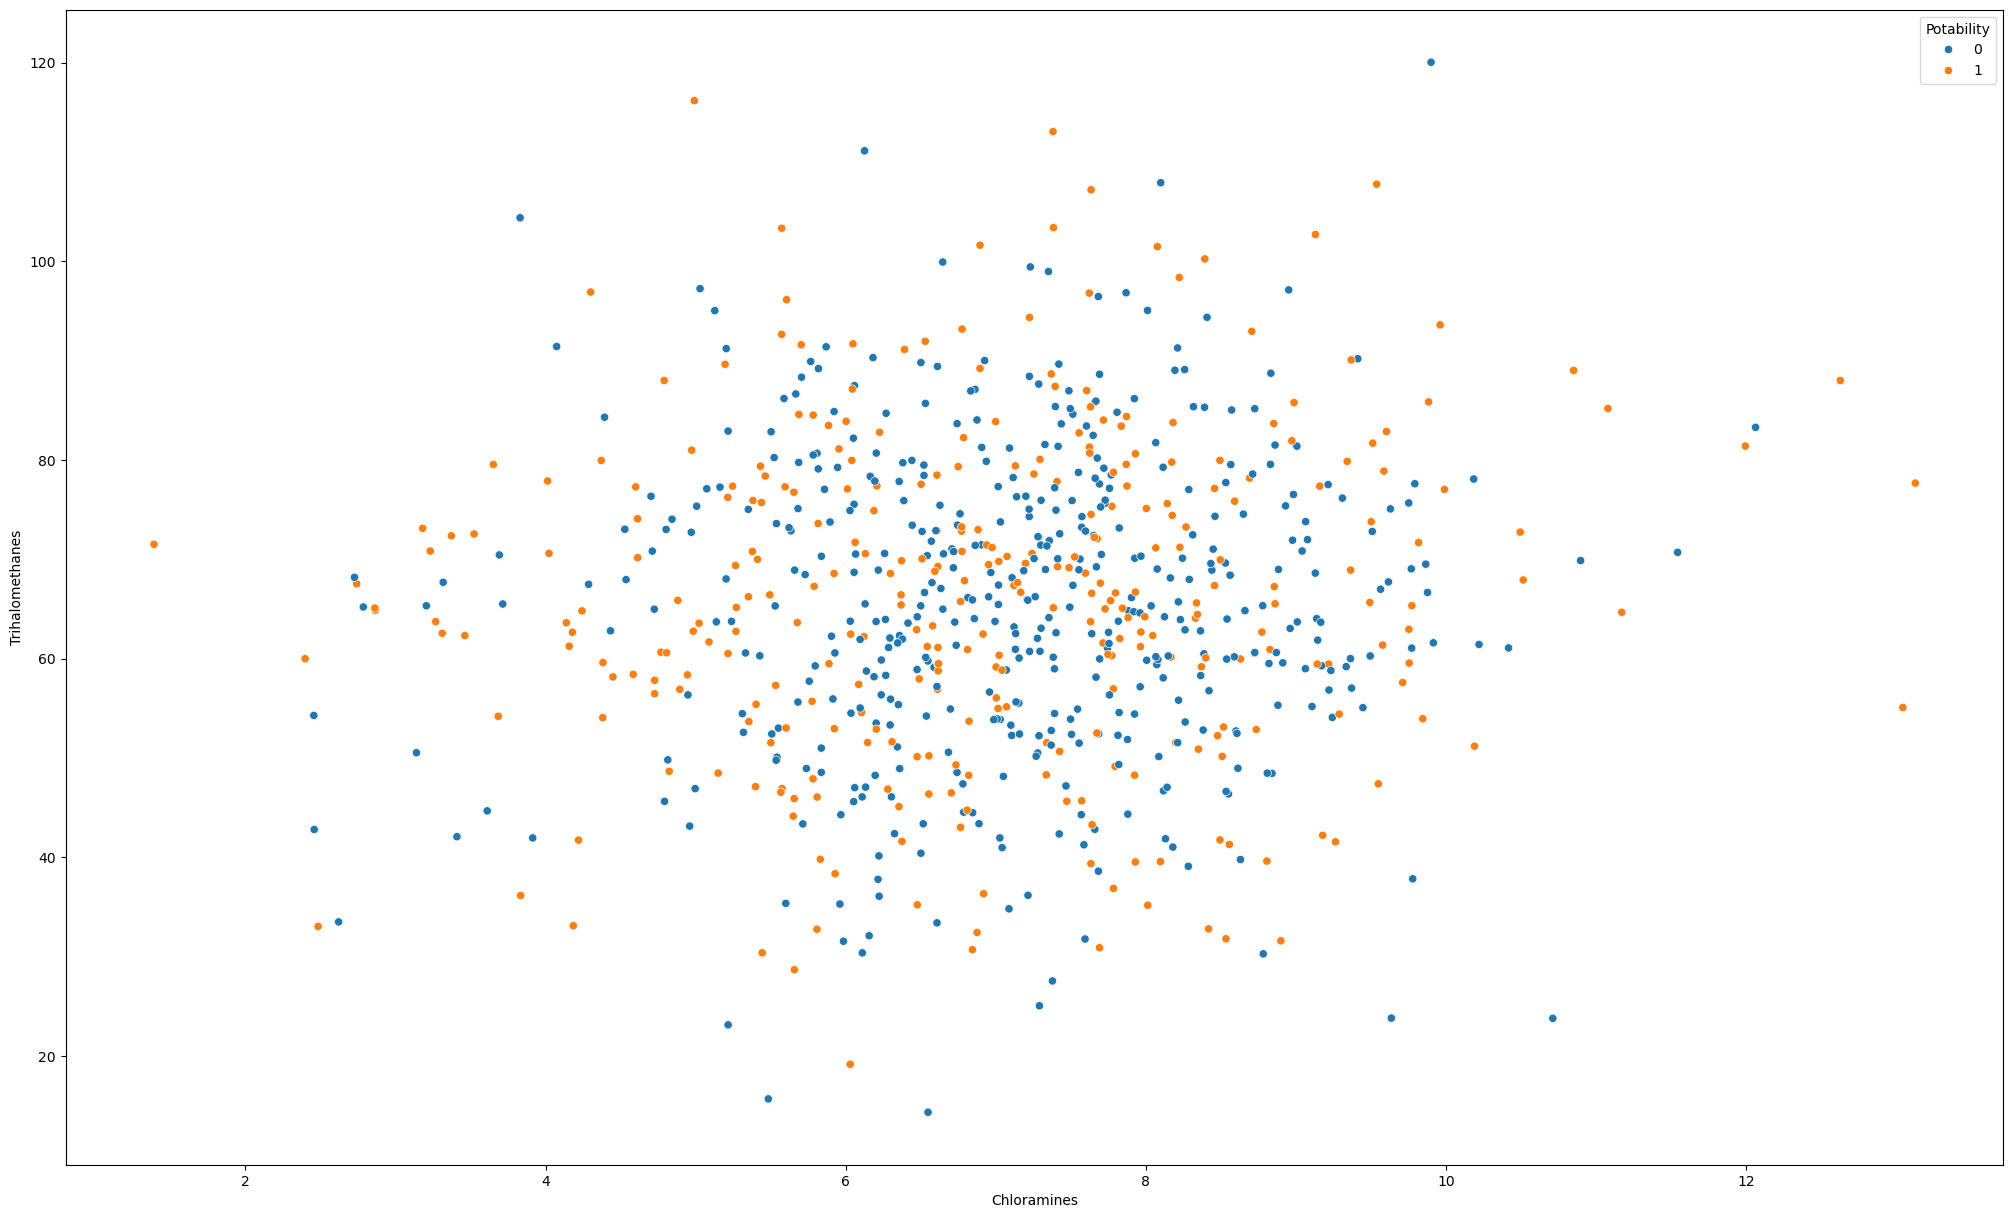

In [27]:
sns.scatterplot(x='Chloramines',y='Trihalomethanes',data=dataset,hue='Potability')

###Splitting X and y variables

In [28]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
nan_count = np.count_nonzero(np.isnan(X))
print("Total NaN values in X:", nan_count)
print(X)


Total NaN values in X: 0
[[5.00000000e+00 5.58408664e+00 2.87486877e+04 7.54486879e+00
  5.49178618e+01 2.55970823e+00]
 [6.00000000e+00 1.02238622e+01 2.87497165e+04 7.51340847e+00
  8.46035562e+01 2.67298874e+00]
 [9.00000000e+00 1.11802845e+01 2.54845085e+04 9.07720002e+00
  7.19766010e+01 4.37056194e+00]
 ...
 [3.26900000e+03 1.14910109e+01 3.71888260e+04 9.26316616e+00
  4.15585007e+01 4.36926431e+00]
 [3.27000000e+03 6.06961576e+00 2.61387802e+04 7.74754748e+00
  6.04199211e+01 3.66971170e+00]
 [3.27100000e+03 4.66810169e+00 4.75809916e+04 7.16663894e+00
  6.66876948e+01 4.43582091e+00]]


## Splitting of Dataset into training and test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
undersample= RandomUnderSampler(sampling_strategy='majority')
X_train,y_train=undersample.fit_resample(X_train,y_train)
print(X_train.shape)
print(y_train.shape)

(518, 6)
(518,)


## Standardisation of all Features

In [30]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

## All Model Fitting

### Logistic Regression

In [31]:

LogCls= LogisticRegression(random_state=0)
LogCls.fit(X_train,y_train)



LogisticRegression(random_state=0)

### Radial Basis Function of SVM Kernel

In [32]:
svc_rbf= SVC(kernel='rbf',random_state=0,probability=True)
svc_rbf.fit(X_train,y_train)

SVC(probability=True, random_state=0)

### Sigmoid of SVM kernel

In [33]:
svc_sigmoid= SVC(kernel='sigmoid',random_state=0,probability=True)
svc_sigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid', probability=True, random_state=0)

### Decision Tree

In [34]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Random Forest

In [35]:
rf=RandomForestClassifier(n_estimators=10,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

### KNN

In [36]:
knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

### *NB*

In [37]:
nb= GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

### **GB**

In [38]:
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(X_train,y_train)


GradientBoostingClassifier(random_state=0)

###AGB

In [39]:
agb= AdaBoostClassifier(random_state=0)
agb.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=0)

In [40]:
all_model=[LogCls,svc_rbf,svc_sigmoid,dt,rf,knn,nb,gbc,agb]

## All Model Test Results

### Logistic Regression

In [41]:
y_LRC_pred= LogCls.predict(X_test)
y_LRC=ca("LRC",y_test,y_LRC_pred)

### Radial Basis Function of SVM Kernel



In [42]:
y_svc_rbf= svc_rbf.predict(X_test)
y_RBF=ca("SVC_RBF",y_test,y_svc_rbf)

### Sigmoid of SVM Kernel


In [43]:
y_svc_sig=svc_sigmoid.predict(X_test)
y_SIG=ca("SVC_SIG",y_test,y_svc_sig)

### Decision Tree

In [44]:
y_dt=dt.predict(X_test)
y_DT=ca("DT",y_test,y_dt)

###Random Forest

In [45]:
y_rf=rf.predict(X_test)
y_RF=ca("RT",y_test,y_rf)

### KNN

In [46]:
y_knn=knn.predict(X_test)
y_KNN=ca("KNN",y_test,y_knn)

### NB

In [47]:
y_nb=nb.predict(X_test)
y_NB=ca("NB",y_test,y_nb)

### GB

In [48]:
y_gbc=gbc.predict(X_test)
y_GBC=ca("GB",y_test,y_gbc)
print(y_GBC)

['GB', array([[88,  2],
       [ 0, 70]], dtype=int64), [0.9875, 0.9722222222222222, 1.0, 0.9859154929577465]]


### **AGB**

In [49]:
y_agb=agb.predict(X_test)
y_AGB=ca("AGB",y_test,y_agb)
print(y_AGB[1])

[[88  2]
 [ 0 70]]


In [50]:
res=[y_LRC,y_RBF,y_SIG,y_DT,y_RF,y_KNN,y_NB,y_GBC,y_AGB]

## HyperParameter Tuning using RandomisedSearchCV

In [51]:
from sklearn.model_selection import RandomizedSearchCV
rs= RandomizedSearchCV(DecisionTreeClassifier(),{},cv=5,n_iter=2)
rs.fit(X_train,y_train)
pd.DataFrame(rs.cv_results_)['mean_test_score']

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=2. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0    0.955601
Name: mean_test_score, dtype: float64

In [52]:
from sklearn.model_selection import RandomizedSearchCV
rs= RandomizedSearchCV(GradientBoostingClassifier(),{'n_estimators':[25,50]},cv=5,n_iter=2)
rs.fit(X_train,y_train)
pd.DataFrame(rs.cv_results_)['mean_test_score']

0    0.774216
1    0.932524
Name: mean_test_score, dtype: float64

## Visualising Feature Importance

6


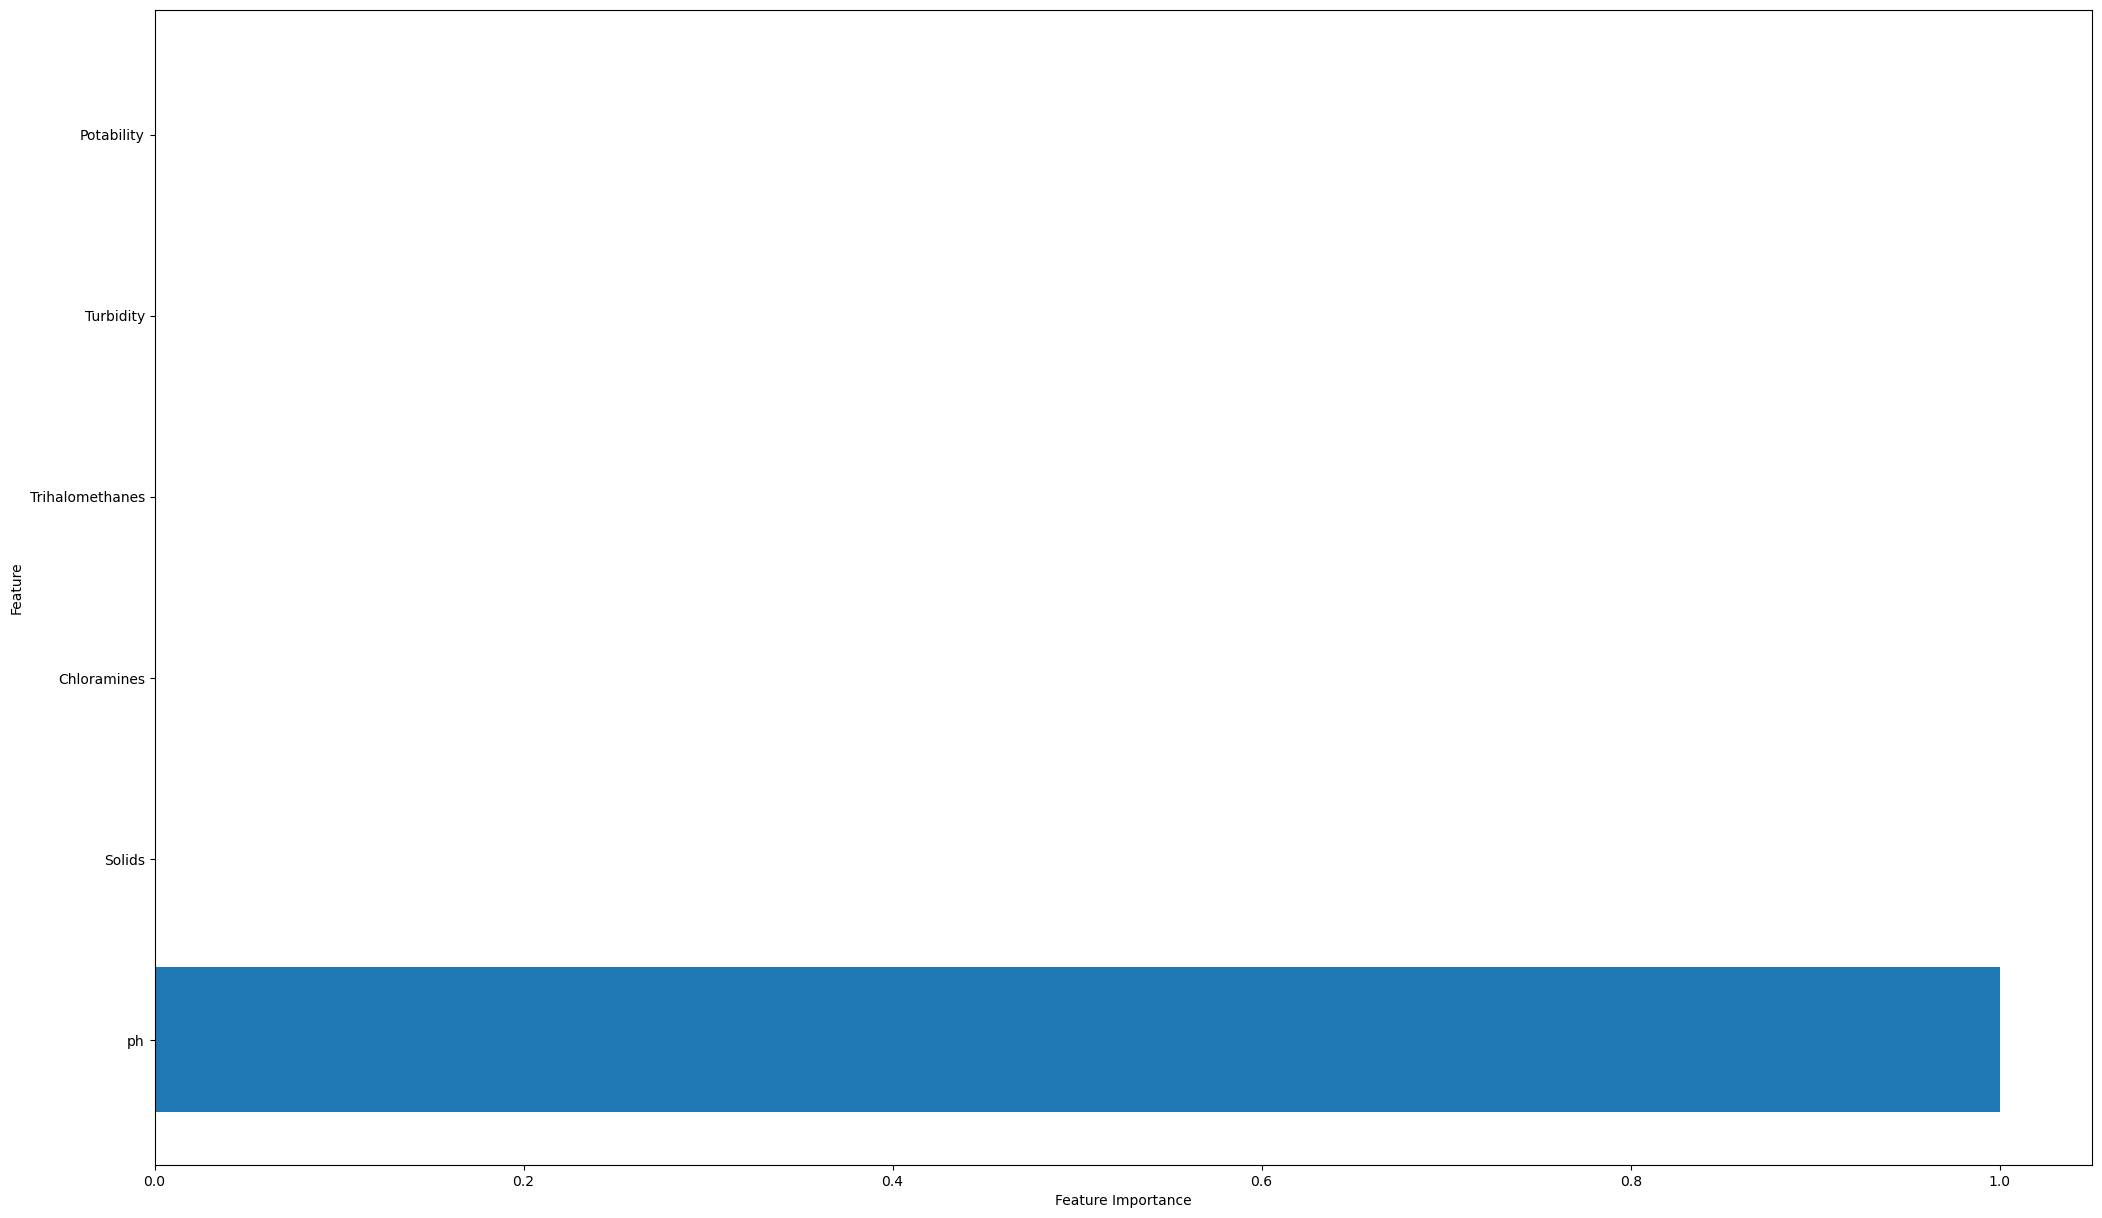

In [53]:
n_features=X_train.shape[1]
plt.barh(range(n_features),dt.feature_importances_)
print(n_features)
plt.yticks(np.arange(6),labels=data_column)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


## Visualising Results

### Plotting Graphs

C:\Users\Pranhav Vimal\AppData\Local\Temp\ipykernel_31580\70778799.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,LRC,SVC_RBF,SVC_SIG,DT,RT,KNN,NB,GB,AGB
Accuracy,61.250000,65.000000,49.375000,98.750000,80.625000,60.625000,62.500000,98.750000,98.750000
Precision,55.263158,57.446809,42.857143,97.222222,76.712329,54.430380,56.578947,97.222222,97.222222
Recall,60.000000,77.142857,47.142857,100.000000,80.000000,61.428571,61.428571,100.000000,100.000000
F1,57.534247,65.853659,44.897959,98.591549,78.321678,57.718121,58.904110,98.591549,98.591549


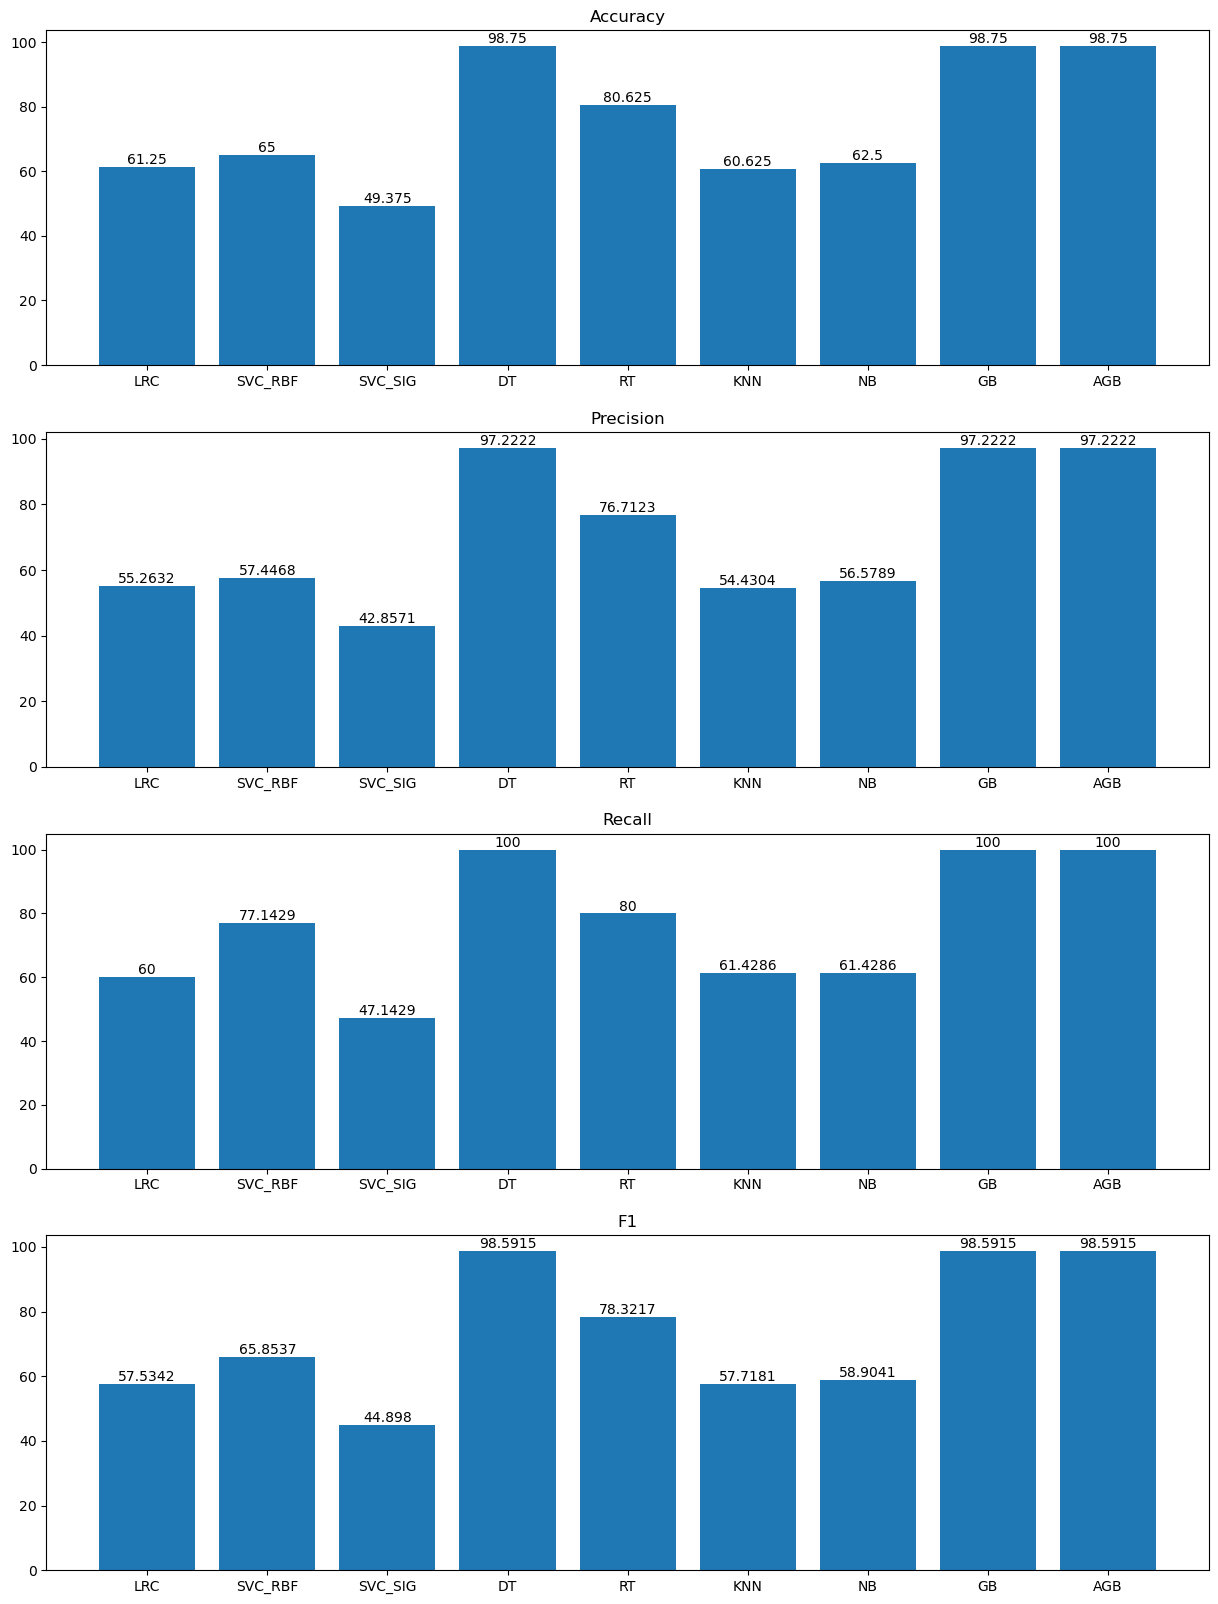

In [54]:
model_name=[i[0] for i in res]
sc_name=['Accuracy','Precision','Recall','F1']
def List_sc(s):
  list_sc=[]
  for j in range(len(model_name)):
    list_sc.append(res[j][-1][s]*100)
  return list_sc


acc=List_sc(0)
prec=List_sc(1)
rec=List_sc(2)
f1=List_sc(3)
df=pd.DataFrame(columns=model_name)
df.loc[len(df.index)]=acc
df.loc[len(df.index)]=prec
df.loc[len(df.index)]=rec
df.loc[len(df.index)]=f1
df.index=sc_name
new_rs=[acc,prec,rec,f1]
def plot_graph():
  fig,ax=plt.subplots(4,figsize=(15,20))
  for i,j in enumerate(sc_name):
    ax[i].bar(model_name,new_rs[i])
    ax[i].set_title(j)
    for container in ax[i].containers:
      ax[i].bar_label(container)
  fig.show()
plot_graph()

df


### PLotting Confusion Matrix for the most Suitable Model

<Axes: >

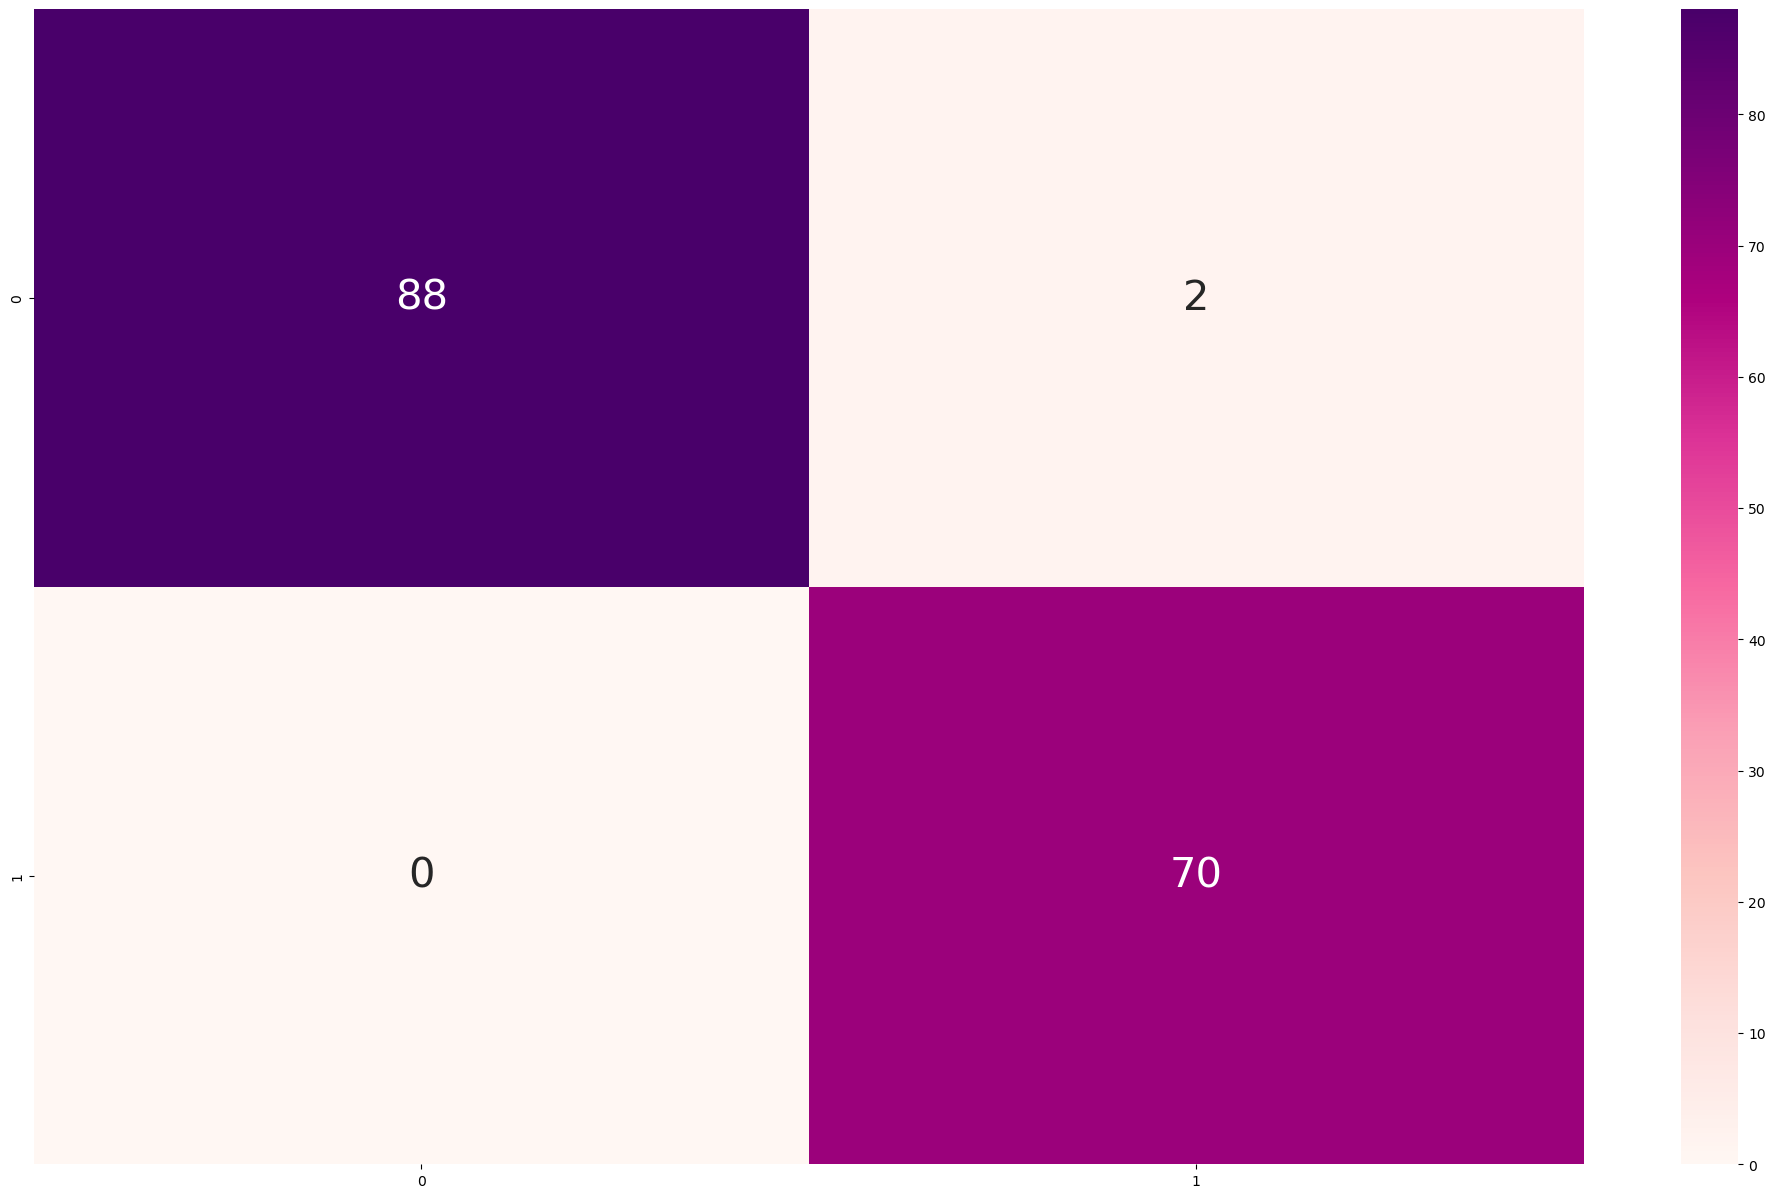

In [55]:
sns.heatmap(y_DT[1],cmap='RdPu',annot= True, annot_kws={"fontsize": 30})

<Axes: >

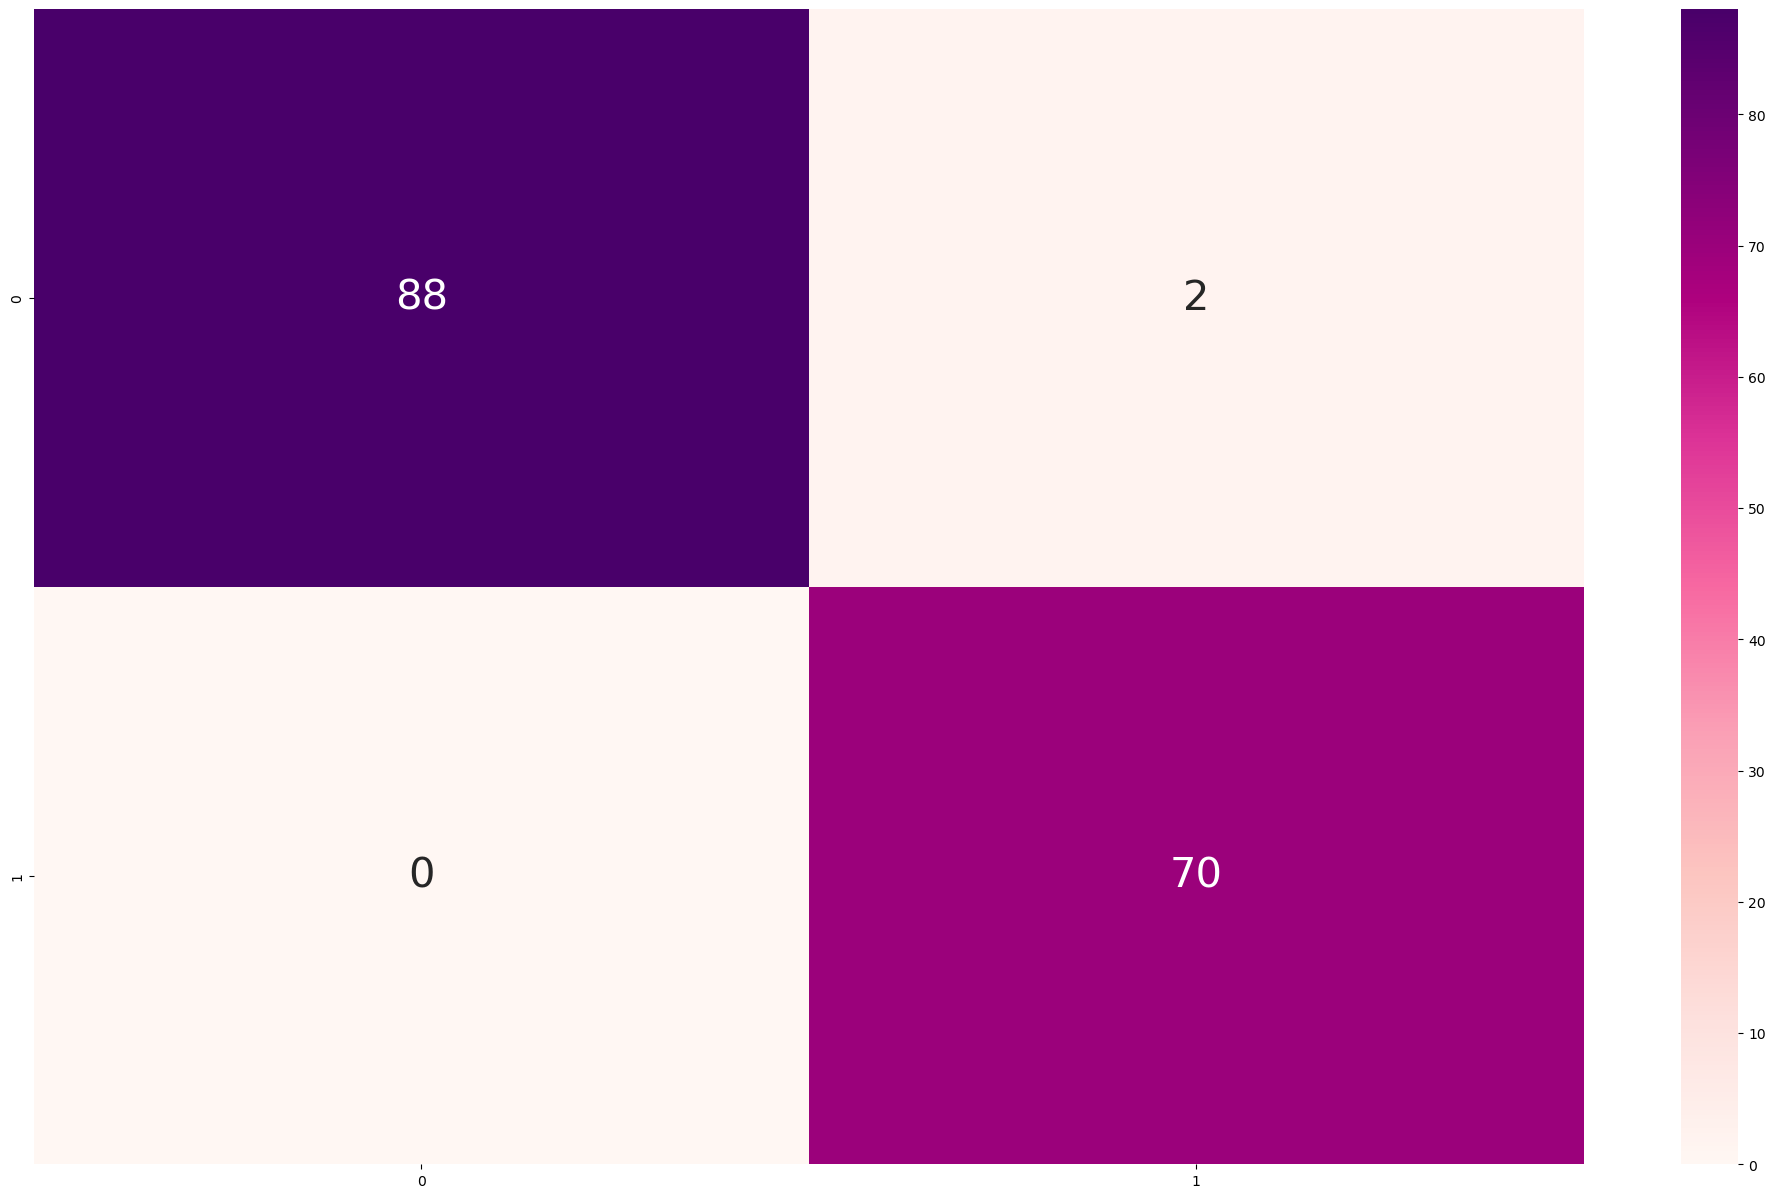

In [56]:
sns.heatmap(y_GBC[1],cmap='RdPu',annot= True, annot_kws={"fontsize": 30})

##ROC Curve

In [57]:
probs=[i.predict_proba(X_test)[:,1] for i in all_model]
print(probs)

[array([0.39369563, 0.35767213, 0.56455407, 0.41794403, 0.39553348,
       0.34741279, 0.37042616, 0.55096348, 0.61810411, 0.6597487 ,
       0.4919814 , 0.48933697, 0.67261374, 0.35139012, 0.25775923,
       0.42603803, 0.51200424, 0.44331713, 0.27578114, 0.3789736 ,
       0.47124634, 0.49704941, 0.41698577, 0.39597151, 0.52750303,
       0.64753754, 0.60228145, 0.61868475, 0.35596634, 0.32456328,
       0.3485335 , 0.3772196 , 0.35052985, 0.47147158, 0.37637442,
       0.53573022, 0.68587066, 0.27422399, 0.37055701, 0.55167129,
       0.57541382, 0.6624348 , 0.70691001, 0.35492867, 0.46495106,
       0.59958034, 0.36330317, 0.45067846, 0.54139904, 0.54983382,
       0.25054332, 0.52963754, 0.19342253, 0.35549647, 0.64068088,
       0.21687914, 0.34339184, 0.5068682 , 0.57353067, 0.63364361,
       0.54207461, 0.77931864, 0.47971446, 0.54276213, 0.35721013,
       0.20204706, 0.37322268, 0.72455178, 0.52697223, 0.48684604,
       0.74247335, 0.464046  , 0.57092605, 0.50530508, 0.7165

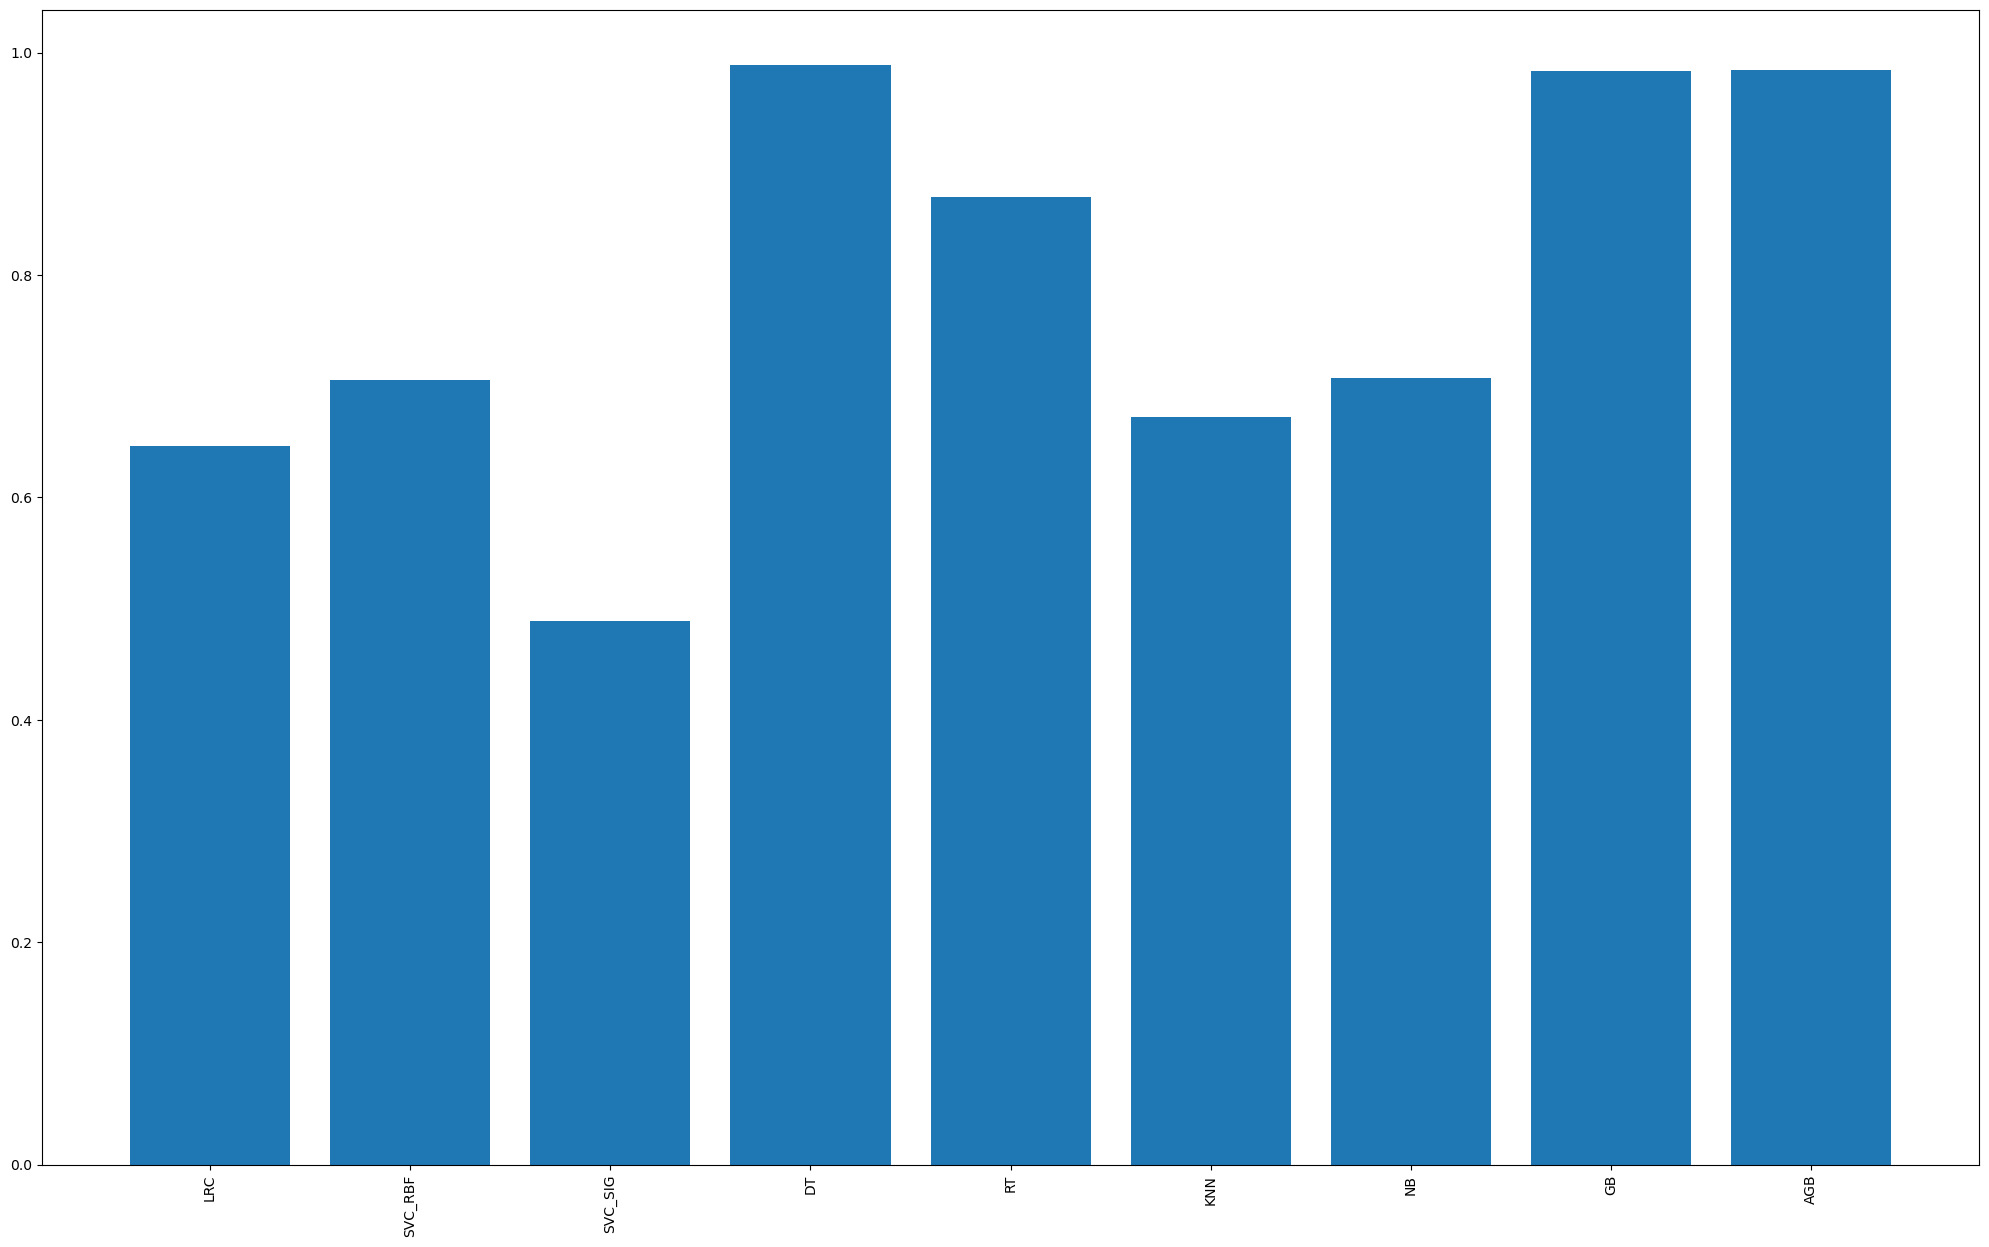

In [58]:
roc= [roc_auc_score(y_test,probs[model_name.index(i)]) for i in model_name]
plt.bar(model_name,roc)
plt.xticks(rotation=90)
plt.show()


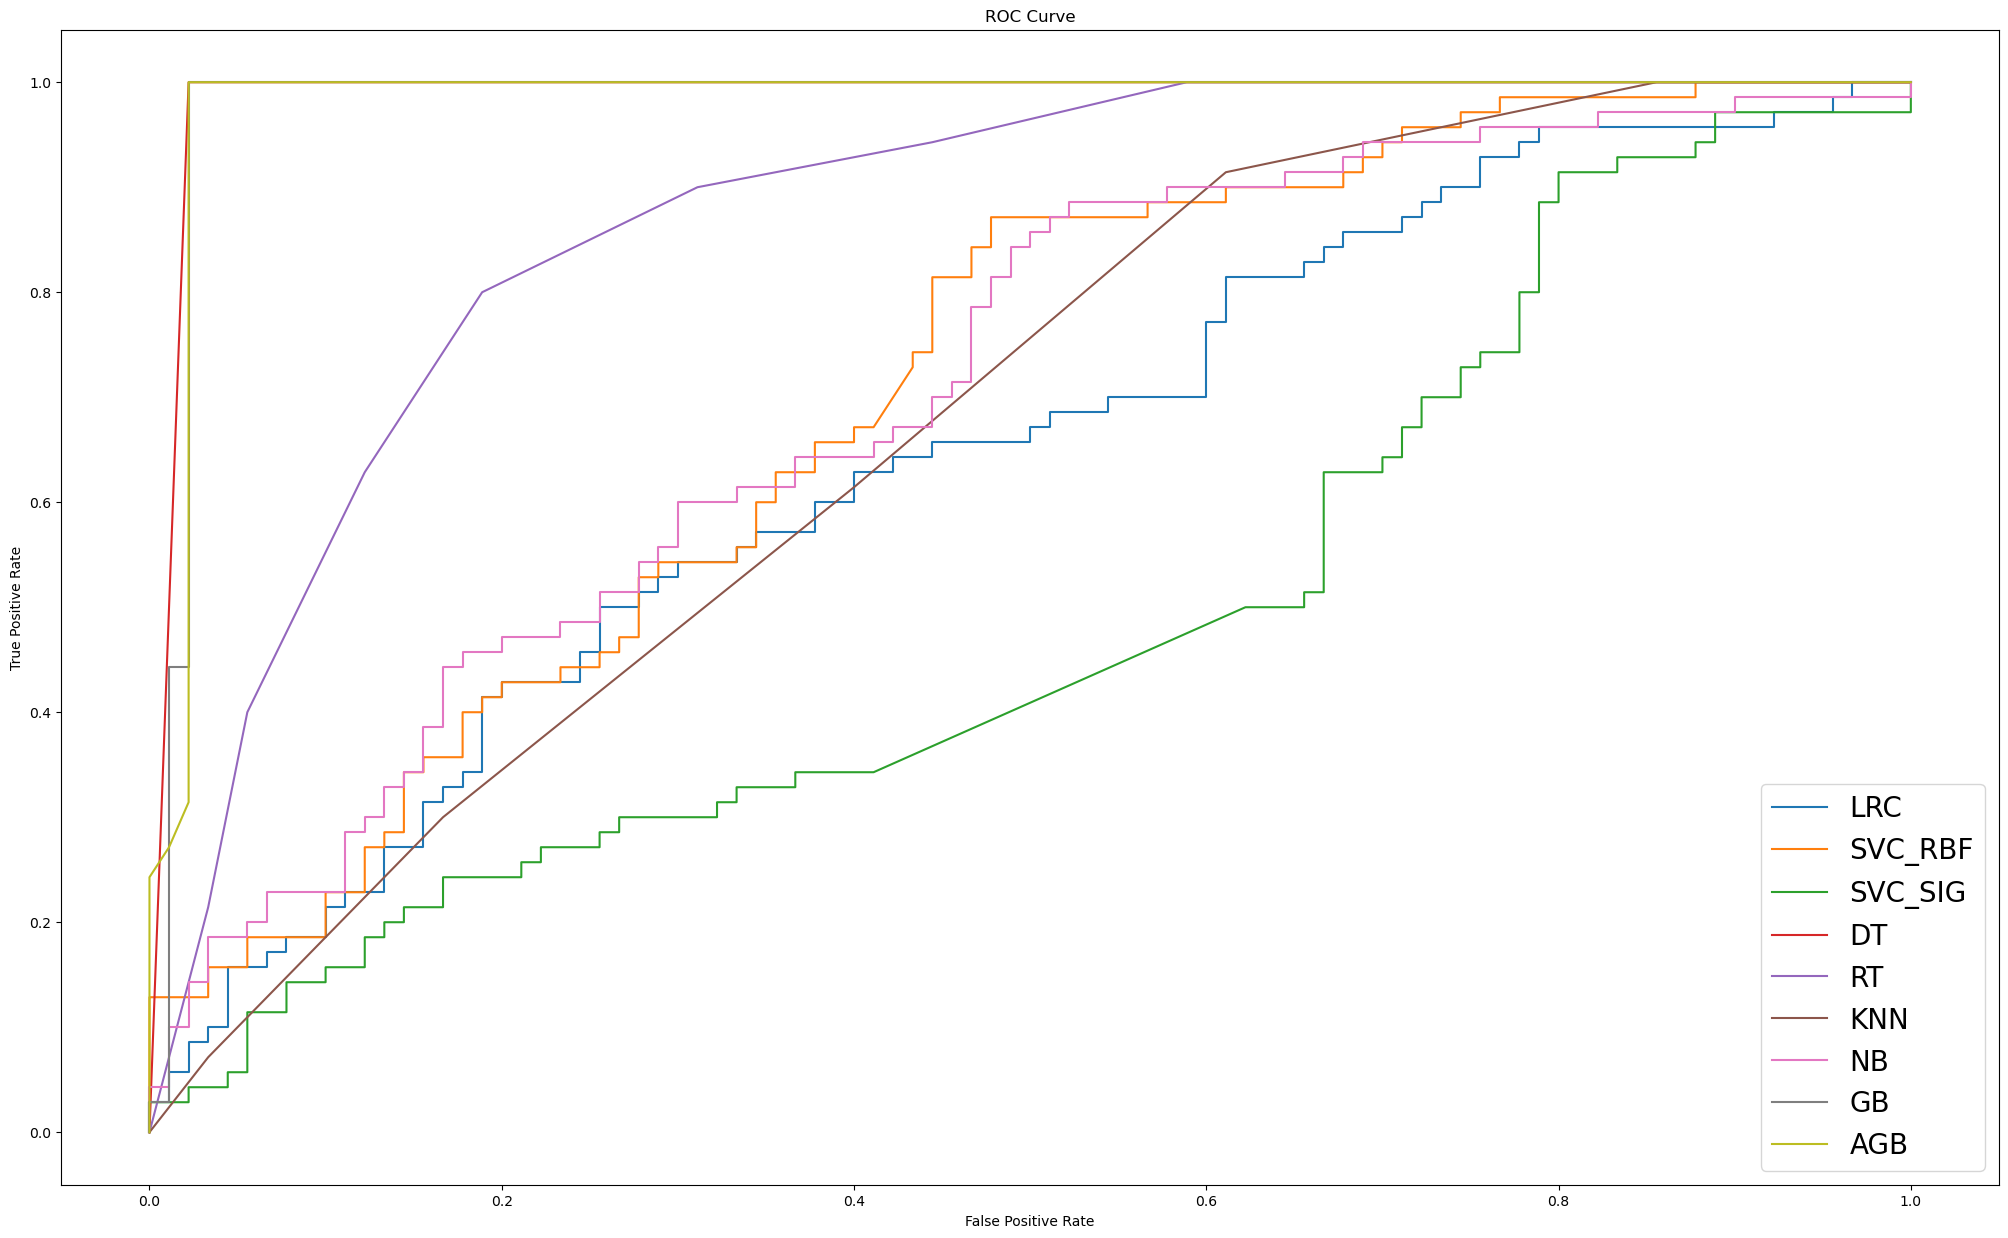

In [59]:
fpr=[roc_curve(y_test,probs[model_name.index(i)])[0] for i in model_name]
tpr= [roc_curve(y_test,probs[model_name.index(i)])[1] for i in model_name]
for i in range(len(model_name)):
  plt.plot(fpr[i],tpr[i],label=model_name[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(fontsize=20)
plt.show()